In [ ]:
# from zipfile import ZipFile 
# with ZipFile('20210101.zip', 'r') as zipObj:
#    # Extract all the contents of zip file in current directory
#    zipObj.extractall()

# # !pip3 install lxml 
# # t_df = pd.read_csv('test/1/weather_data.csv')

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df1 = pd.read_csv('2018.txt')
df2 = pd.read_csv('2019.txt')
df3 = pd.read_csv('2020.txt')
df4 = pd.read_csv('2021.txt')
# df5 = pd.read_csv('2017_imgs.csv')
df5 = pd.read_csv('2021_recent.txt')

In [3]:
df = pd.concat([df1, df2, df3,df4], ignore_index=True)
df = df.drop(['Solar Eclipse Shading'],axis = 1)
df = pd.concat([df, df5], ignore_index=True)
df.columns = ['Date', 'MST','GHI', 'DNI','Zenith Angle','Azimuth Angle','Dry Temp','Wet Temp','Dew Temp', 'RH','TCC','Wind Speed','Wind Direction','Pressure','Precipitation','Snow Depth','Moisture','Albedo']

In [4]:
# df = pd.concat([df5,df], ignore_index=True)
# df
df

,Date,MST,GHI,DNI,Zenith Angle,Azimuth Angle,Dry Temp,Wet Temp,Dew Temp,RH,TCC,Wind Speed,Wind Direction,Pressure,Precipitation,Snow Depth,Moisture,Albedo
0,12/1/2017,07:06,6.92743,-0.029810,89.88053,118.69174,8.88,1.949,-7.351,28.77,-1,3.45,299.1,814.620,0.0,0.490,0.0,0.0
1,12/1/2017,07:07,8.75574,0.044716,89.73395,118.85123,9.24,2.006,-7.594,27.49,-1,3.70,292.6,814.606,0.0,0.623,0.0,0.0
2,12/1/2017,07:08,10.16190,0.372632,89.58648,119.01100,9.69,2.276,-7.624,26.60,-1,2.45,291.5,814.632,0.0,0.520,0.0,0.0
3,12/1/2017,07:09,11.81470,159.069000,89.43807,119.17104,9.91,2.406,-7.594,26.28,-1,3.20,305.9,814.617,0.0,0.515,0.0,0.0
4,12/1/2017,07:10,13.30970,212.480000,89.28871,119.33135,10.21,2.528,-7.772,25.36,-1,3.45,294.3,814.599,0.0,0.531,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063277,12/1/2021,16:30,5.13126,-0.565152,89.35451,240.65056,18.01,7.275,-4.025,21.12,-1,3.70,292.4,819.896,0.0,-0.219,0.0,0.0
1063278,12/1/2021,16:31,4.74091,-0.496351,89.50345,240.81060,18.00,7.240,-4.060,21.07,-1,3.45,286.6,819.894,0.0,-0.217,0.0,0.0
1063279,12/1/2021,16:32,4.32255,-0.427550,89.65144,240.97036,18.00,7.234,-4.066,21.06,-1,3.45,289.7,819.900,0.0,-0.253,0.0,0.0
1063280,12/1/2021,16:33,3.88617,-0.437379,89.79851,241.12985,17.96,7.310,-3.990,21.25,-1,2.45,299.4,819.918,0.0,-0.352,0.0,0.0


## Data Cleaning

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GHI,1063282.0,385.443902,302.393122,-2.89371,118.864250,322.367000,605.216750,1473.88000
DNI,1063282.0,461.994091,402.638444,-15.73200,3.031123,487.150500,876.658000,1088.22000
Zenith Angle,1063282.0,59.103354,19.139813,16.30284,45.119928,61.610625,74.494555,90.00000
Azimuth Angle,1063282.0,179.998820,65.771194,58.41938,121.841260,179.992035,238.157205,301.58467
Dry Temp,1063282.0,14.476784,10.706395,-22.74000,6.402000,15.220000,23.110000,37.81000
Wet Temp,1063282.0,6.434731,7.011710,-23.07000,1.156000,6.936000,12.568000,20.39500
Dew Temp,1063282.0,-1.590654,8.006333,-33.93600,-7.563000,-1.757000,4.677000,19.75500
RH,1063282.0,38.898452,23.928393,1.94700,20.420000,32.020000,52.150000,100.20000
TCC,1063282.0,22.105960,449.624590,-7999.00000,14.000000,36.000000,88.000000,100.00000
Wind Speed,1063282.0,2.948327,2.003500,0.00000,1.700000,2.700000,3.700000,23.45000


In [6]:
# df.describe().transpose()
def calc_time(time):
    a, b = time.split(':')
    return ( int(a)*60 + int(b) )

def calc_day(days_list):
    unique_days_list = list(days_list.unique())
    return ([unique_days_list.index(day)+1 for day in days_list])

In [7]:
df['Snow Depth'].replace(-7999, np.NaN, inplace  = True)
df['Snow Depth'].fillna(method="ffill", inplace=True)

df['Albedo'].replace(-99999, np.NaN, inplace  = True)
df['Albedo'].fillna(method="ffill", inplace=True)
df['Albedo'][df['Albedo']>1] = 1

/tmp/ipykernel_71089/1330820370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Albedo'][df['Albedo']>1] = 1


In [8]:
df['Time'] = [calc_time(i) for i in df['MST']]
df['day'] = calc_day(df['Date'])

### Images

In [9]:
def fillna_nearest(series):
    fact = series.astype('category').factorize()

    series_cat = pd.Series(fact[0]).replace(-1, np.nan) # get string as categorical (-1 is NaN)
    series_cat_interp = series_cat.interpolate("nearest") # interpolate categorical

    cat_to_string = {i:x for i,x in enumerate(fact[1])} # dict connecting category to string
    series_str_interp = series_cat_interp.map(cat_to_string) # turn category back to string

    return series_str_interp

In [10]:
imgs_df = df.copy(deep=False)

imgs_df['Normal imgs NE'] = np.NaN
imgs_df['Normal imgs UE'] = np.NaN
imgs_df['Proj imgs NE'] = np.NaN
imgs_df['Proj imgs UE'] = np.NaN
imgs_df['BRBG imgs'] = np.NaN
imgs_df['CDOC imgs'] = np.NaN

In [11]:
import os
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

In [12]:
all_images = []
import os
for dir in os.listdir('Images/'):
    all_images.append(listdir_fullpath('Images/' + dir))

In [13]:
images_per_day = [] 
for i in range(len(all_images)):
    images_per_day.append(len(all_images[i]))

In [14]:
all_images_flat = list(np.concatenate(all_images).flat)

In [393]:
time_lst = []
for time in imgs_df['MST']:
    time_lst.append(time.split(':')[0] + time.split(':')[1])
imgs_df['MST_img'] = time_lst

In [394]:
def pad(s):
    if(len(s) == 1):
        return '0'+s
    else:
        return s
date_lst = []
for date in imgs_df['Date']:
    date_lst.append( date.split('/')[2] + pad(date.split('/')[0]) + pad(date.split('/')[1]) )
imgs_df['Date_img'] = date_lst

In [395]:
paths_dict = dict.fromkeys(all_images_flat , 1)

In [396]:
c1 = []
c2 = []
c3 = []
c4 = []
c5 = []
c6 = []
for i in range(len(imgs_df)):
    for j in list(imgs_df.columns[20:26]):
        if(j == imgs_df.columns[20]):
            x = 'Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_11.jpg'
            if x in paths_dict.keys():
                c1.append('Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_11.jpg')
            else:
                c1.append(np.NaN)
        if(j == imgs_df.columns[21]):
            x = 'Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_12.jpg'
            if x in paths_dict.keys():
                c2.append('Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_12.jpg')
            else:
                c2.append(np.NaN)
        if(j == imgs_df.columns[22]):
            x = 'Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_11_NE.jpg'
            if x in paths_dict.keys():
                c3.append('Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_11_NE.jpg')
            else:
                c3.append(np.NaN)
        if(j == imgs_df.columns[23]):
            x = 'Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_12_UE.jpg'
            if x in paths_dict.keys():
                c4.append('Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_12_UE.jpg')
            else:
                c4.append(np.NaN)
        if(j == imgs_df.columns[24]):
            x = 'Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_1112_BRBG.png'
            if x in paths_dict.keys():
                c5.append('Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_1112_BRBG.png')
            else:
                c5.append(np.NaN)
        if(j == imgs_df.columns[25]):
            x = 'Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_1112_CDOC.png'
            if x in paths_dict.keys():
                c6.append('Images/'+ date_lst[i]+'/'+ date_lst[i] + time_lst[i] + '00' + '_1112_CDOC.png')
            else:
                c6.append(np.NaN)

In [397]:
imgs_df[imgs_df.columns[20]] = c1
imgs_df[imgs_df.columns[21]] = c2 
imgs_df[imgs_df.columns[22]] = c3
imgs_df[imgs_df.columns[23]] = c4 
imgs_df[imgs_df.columns[24]]= c5
imgs_df[imgs_df.columns[25]] = c6

In [398]:
del_imgs_days = ['20180417', '20180418', '20180419','20181228','20181231','20190101','20200404','20200405','20210829','20211025','20211104']
for day in del_imgs_days:
    imgs_df = imgs_df[imgs_df['Date_img'] != day]

In [399]:
grouped_imgs_df = imgs_df.groupby(['day'], sort = False, as_index = False)

In [400]:
indexes = np.array([])
for name,group in grouped_imgs_df:
  x = group['Proj imgs NE']
  indexes = np.append(indexes,list(range(group[~(x.isnull())].index[0],group[~(x.isnull())].index[-1] + 1)))

In [401]:
cleaned_imgs_df = imgs_df.loc[indexes.astype('int64')]
cleaned_imgs_df = cleaned_imgs_df.reset_index(drop=True)
cleaned_imgs_df = cleaned_imgs_df[~((cleaned_imgs_df['Proj imgs NE'].isnull()) & (cleaned_imgs_df['Time']%10 != 0))]
cleaned_imgs_df = cleaned_imgs_df.reset_index(drop=True)
cleaned_imgs_df['day'] = cleaned_imgs_df['day'] - 30

In [402]:
cleaned_imgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103741 entries, 0 to 103740
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            103741 non-null  object 
 1   MST             103741 non-null  object 
 2   GHI             103741 non-null  float64
 3   DNI             103741 non-null  float64
 4   Zenith Angle    103741 non-null  float64
 5   Azimuth Angle   103741 non-null  float64
 6   Dry Temp        103741 non-null  float64
 7   Wet Temp        103741 non-null  float64
 8   Dew Temp        103741 non-null  float64
 9   RH              103741 non-null  float64
 10  TCC             103741 non-null  int64  
 11  Wind Speed      103741 non-null  float64
 12  Wind Direction  103741 non-null  float64
 13  Pressure        103741 non-null  float64
 14  Precipitation   103741 non-null  float64
 15  Snow Depth      103741 non-null  float64
 16  Moisture        103741 non-null  float64
 17  Albedo    

In [407]:
cleaned_imgs_df[cleaned_imgs_df['Proj imgs NE'].isnull()]

,Date,MST,GHI,DNI,Zenith Angle,Azimuth Angle,Dry Temp,Wet Temp,Dew Temp,RH,...,Time,day,Normal imgs NE,Normal imgs UE,Proj imgs NE,Proj imgs UE,BRBG imgs,CDOC imgs,MST_img,Date_img
638,12/13/2017,10:10,197.2190,21.647000,67.50562,153.88002,7.154,-0.387,-14.087,17.71,...,610,-18,NaN,NaN,NaN,NaN,NaN,NaN,1010,20171213
639,12/13/2017,10:20,199.0420,8.177880,66.69650,156.21306,7.155,-0.491,-14.191,17.54,...,620,-18,NaN,NaN,NaN,NaN,NaN,NaN,1020,20171213
640,12/13/2017,10:30,206.2440,1.967480,65.95946,158.58791,7.137,-0.511,-14.211,17.53,...,630,-18,NaN,NaN,NaN,NaN,NaN,NaN,1030,20171213
949,12/18/2017,15:20,108.7940,357.324000,78.75047,226.28961,12.980,4.058,-7.042,22.50,...,920,-13,NaN,NaN,NaN,NaN,NaN,NaN,1520,20171218
950,12/18/2017,15:30,50.2618,94.328900,80.15189,228.12896,12.150,3.675,-7.125,23.59,...,930,-13,NaN,NaN,NaN,NaN,NaN,NaN,1530,20171218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103063,11/24/2021,14:20,96.2764,0.098286,70.10909,217.86452,3.722,-0.397,-5.997,46.20,...,860,1424,NaN,NaN,NaN,NaN,NaN,NaN,1420,20211124
103064,11/24/2021,14:30,111.0960,0.304688,71.31526,219.98416,3.740,-0.461,-6.261,45.10,...,870,1424,NaN,NaN,NaN,NaN,NaN,NaN,1430,20211124
103433,12/1/2021,09:20,133.8930,8.575550,70.82863,143.31848,17.040,7.053,-3.447,23.58,...,560,1431,NaN,NaN,NaN,NaN,NaN,NaN,0920,20211201
103434,12/1/2021,09:30,139.2060,64.550100,69.71298,145.47641,17.170,7.130,-3.270,23.74,...,570,1431,NaN,NaN,NaN,NaN,NaN,NaN,0930,20211201


In [404]:
for i in list(cleaned_imgs_df[~(cleaned_imgs_df['Proj imgs NE'].isnull()) & (cleaned_imgs_df['Time']%10 != 0)].index):
    time = cleaned_imgs_df['Time'].iloc[i]
    if(time%10 <=5):
        if type(cleaned_imgs_df['Proj imgs NE'].iloc[i-1])!=str:
            cleaned_imgs_df.loc[(i-1),(cleaned_imgs_df.columns[20:26])] = cleaned_imgs_df.loc[(i),(cleaned_imgs_df.columns[20:26])]
        else:
            if type(cleaned_imgs_df['Proj imgs NE'].iloc[i+1])!=str:
                cleaned_imgs_df.loc[(i+1),(cleaned_imgs_df.columns[20:26])] = cleaned_imgs_df.loc[(i),(cleaned_imgs_df.columns[20:26])]
            else:
                pass

In [405]:
cleaned_imgs_df.drop(list(cleaned_imgs_df[~(cleaned_imgs_df['Proj imgs NE'].isnull()) & (cleaned_imgs_df['Time']%10 != 0)].index),inplace = True)
cleaned_imgs_df.reset_index(drop = True,inplace = True)

In [406]:
# Run after re running above 2 or 4 cells
for day in test_days_list_unique:
    for col in list(cleaned_imgs_df.columns[20:26]):
        cleaned_imgs_df.loc[(cleaned_imgs_df[cleaned_imgs_df['day']==day][col].index).astype('int64'), (col)] = list(fillna_nearest(cleaned_imgs_df[cleaned_imgs_df['day']==day][col]))
        cleaned_imgs_df.loc[(cleaned_imgs_df[cleaned_imgs_df['day']==day][col].index).astype('int64'), (col)] = list(fillna_nearest(cleaned_imgs_df[cleaned_imgs_df['day']==day][col]))

In [408]:
add_features(cleaned_imgs_df)
current_last_day = 1431

In [409]:
cleaned_imgs_df['day'].describe()

count    103477.000000
mean        705.831866
std         420.092240
min         -29.000000
25%         335.000000
50%         698.000000
75%        1070.000000
max        1431.000000
Name: day, dtype: float64

In [386]:
cleaned_imgs_df

,Date,MST,GHI,DNI,Zenith Angle,Azimuth Angle,Dry Temp,Wet Temp,Dew Temp,RH,...,Proj imgs UE,BRBG imgs,CDOC imgs,MST_img,Date_img,Declination Angle,distance factor,Wind_x,Wind_y,Clear Sky GHI
0,12/1/2017,07:10,13.30970,212.480000,89.28871,119.33135,10.21,2.528,-7.772,25.36,...,Images/20171201/20171201071000_12_UE.jpg,Images/20171201/20171201071000_1112_BRBG.png,Images/20171201/20171201071000_1112_CDOC.png,0710,20171201,-0.409105,0.878124,1.419725,-3.144341,13.583751
1,12/1/2017,07:20,30.88390,361.561000,87.75468,120.95016,11.07,2.992,-7.408,24.72,...,Images/20171201/20171201072000_12_UE.jpg,Images/20171201/20171201072000_1112_BRBG.png,Images/20171201/20171201072000_1112_CDOC.png,0720,20171201,-0.409105,0.878124,2.028488,-3.389356,42.804430
2,12/1/2017,07:30,52.38490,475.751000,86.18760,122.59905,11.32,3.279,-7.111,24.95,...,Images/20171201/20171201073000_12_UE.jpg,Images/20171201/20171201073000_1112_BRBG.png,Images/20171201/20171201073000_1112_CDOC.png,0730,20171201,-0.409105,0.878124,1.115431,-2.999302,72.530971
3,12/1/2017,07:40,25.40700,14.517500,84.62281,124.28029,10.99,3.106,-7.094,25.54,...,Images/20171201/20171201074000_12_UE.jpg,Images/20171201/20171201074000_1112_BRBG.png,Images/20171201/20171201074000_1112_CDOC.png,0740,20171201,-0.409105,0.878124,-0.034556,-2.199729,102.067937
4,12/1/2017,07:50,106.54600,634.944000,83.07628,125.99608,11.02,3.051,-7.349,24.93,...,Images/20171201/20171201075000_12_UE.jpg,Images/20171201/20171201075000_1112_BRBG.png,Images/20171201/20171201075000_1112_CDOC.png,0750,20171201,-0.409105,0.878124,0.567782,-2.383301,131.095973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93737,12/1/2021,15:50,95.93110,625.967000,83.14403,233.99678,20.41,8.315,-3.985,18.25,...,Images/20211201/20211201155000_12_UE.jpg,Images/20211201/20211201155000_1112_BRBG.png,Images/20211201/20211201155000_1112_CDOC.png,1550,20211201,-0.409105,0.869764,1.270873,-2.936815,129.828019
93738,12/1/2021,16:00,70.30890,554.892000,84.69147,235.70981,20.19,8.261,-4.029,18.43,...,Images/20211201/20211201160000_12_UE.jpg,Images/20211201/20211201160000_1112_BRBG.png,Images/20211201/20211201160000_1112_CDOC.png,1600,20211201,-0.409105,0.869764,1.916700,-3.164848,100.775266
93739,12/1/2021,16:10,15.40180,2.712680,86.25671,237.38831,19.45,7.935,-3.965,19.40,...,Images/20211201/20211201161000_12_UE.jpg,Images/20211201/20211201161000_1112_BRBG.png,Images/20211201/20211201161000_1112_CDOC.png,1610,20211201,-0.409105,0.869764,0.919554,-3.065032,71.222927
93740,12/1/2021,16:20,10.41260,-0.732237,87.82324,239.03447,18.47,7.521,-3.979,20.60,...,Images/20211201/20211201162000_12_UE.jpg,Images/20211201/20211201162000_1112_BRBG.png,Images/20211201/20211201162000_1112_CDOC.png,1620,20211201,-0.409105,0.869764,2.107806,-2.407728,41.500880


In [410]:
###
null_percent = []
grouped_cleaned_imgs_df = cleaned_imgs_df.groupby(['day'], sort = False, as_index = False)
for day,group in grouped_cleaned_imgs_df:
    null_percent.append([(group['Proj imgs NE'].isnull().sum())/len(group['Proj imgs NE']), day])

In [411]:
del_days = []
for a, b in null_percent:
    if(a>=0.1):
        print([b, a])
        del_days.append(b)

[14, 0.12280701754385964]
[133, 0.10588235294117647]
[139, 0.1388888888888889]
[174, 0.11235955056179775]
[210, 0.10465116279069768]
[211, 0.11764705882352941]
[212, 0.15294117647058825]
[213, 0.12941176470588237]
[215, 0.14285714285714285]
[216, 0.23809523809523808]
[283, 0.11764705882352941]
[289, 0.13636363636363635]
[291, 0.13636363636363635]
[292, 0.125]
[341, 0.14285714285714285]
[356, 0.10909090909090909]
[358, 0.12727272727272726]
[360, 0.21428571428571427]
[372, 0.14035087719298245]
[374, 0.12280701754385964]
[433, 0.4782608695652174]
[445, 0.1232876712328767]
[449, 0.13513513513513514]
[452, 0.17567567567567569]
[453, 0.14864864864864866]
[454, 0.10666666666666667]
[459, 0.13157894736842105]
[460, 0.15789473684210525]
[461, 0.16883116883116883]
[462, 0.12987012987012986]
[464, 0.21794871794871795]
[467, 0.22784810126582278]
[468, 0.189873417721519]
[471, 0.26582278481012656]
[473, 0.20253164556962025]
[474, 0.19753086419753085]
[475, 0.2962962962962963]
[476, 0.25925925925925

In [412]:
def create_day(index_list,day):
    global cleaned_imgs_df, current_last_day
    for start,end,length in index_list:
        cleaned_imgs_df.loc[(list(range(start,end+1))), ('day')] = [current_last_day+1 for i in range(start,end+1)]
        current_last_day = current_last_day + 1
    cleaned_imgs_df = cleaned_imgs_df[cleaned_imgs_df['day'] != day]
    cleaned_imgs_df.reset_index(drop = True, inplace = True)
        
def cut_down(day):
    global cleaned_imgs_df
    if(len(list(cleaned_imgs_df[cleaned_imgs_df['day'] == day].index)) == 0): return
    start_index = list(cleaned_imgs_df[cleaned_imgs_df['day'] == day].index)[0]
    freq = 0
    index_list = []
    for i in list(cleaned_imgs_df[cleaned_imgs_df['day'] == day].index):
        if cleaned_imgs_df['Proj imgs NE'].loc[i] is np.NaN:
            if freq>=12:
                index_list.append([start_index, i-1,freq])
#             print(freq)
            freq = 0
            start_index = i + 1
#             if(freq>12):
#                 freq = 1
        else:
            freq = freq + 1
            
    if freq>=12:
        index_list.append([start_index,i,freq])
#     return index_list
    if len(index_list)!=0:
        create_day(index_list, day)
    else:
        cleaned_imgs_df = cleaned_imgs_df[cleaned_imgs_df['day'] != day]
        cleaned_imgs_df.reset_index(drop = True, inplace = True)

In [198]:
test_days_imputed = [72,121,130,203,285,355,444,478,481,482,489,495,498,502,503,508,612,629,1330]

In [413]:
for day in del_days:
    if day in test_days_list_unique:
        pass
    else:
        cut_down(day)

/home/u00udgkwswg89hmuTA357/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [416]:
# Analyzing -ve TCC values and their frequencies
y =list(cleaned_imgs_df[cleaned_imgs_df['Proj imgs NE'].isnull()].index)

freqs = []
freq = 1
for i in range(len(y)-1):
    if(y[i] == y[i+1]-1):
        freq = freq + 1
    else:
        freqs.append([freq, cleaned_imgs_df['day'].loc[y[i]]])
        freq = 1

freqs

[[3, -18],
 [3, -13],
 [3, -2],
 [5, -1],
 [3, 0],
 [3, 19],
 [1, 25],
 [1, 26],
 [3, 27],
 [1, 27],
 [1, 28],
 [1, 29],
 [1, 31],
 [3, 32],
 [1, 32],
 [1, 33],
 [1, 34],
 [1, 44],
 [1, 45],
 [3, 47],
 [5, 48],
 [1, 48],
 [1, 49],
 [3, 50],
 [1, 50],
 [1, 52],
 [1, 53],
 [3, 54],
 [1, 54],
 [1, 55],
 [1, 58],
 [1, 59],
 [1, 62],
 [1, 63],
 [1, 65],
 [1, 66],
 [1, 67],
 [1, 69],
 [1, 70],
 [1, 71],
 [1, 73],
 [1, 74],
 [1, 75],
 [1, 76],
 [1, 78],
 [1, 79],
 [1, 80],
 [3, 81],
 [1, 81],
 [1, 82],
 [1, 85],
 [1, 86],
 [1, 87],
 [1, 88],
 [1, 89],
 [1, 91],
 [3, 96],
 [1, 96],
 [1, 97],
 [3, 99],
 [1, 99],
 [1, 101],
 [1, 103],
 [3, 106],
 [1, 106],
 [1, 110],
 [1, 111],
 [3, 112],
 [1, 112],
 [1, 113],
 [4, 114],
 [1, 114],
 [1, 116],
 [1, 117],
 [1, 118],
 [1, 119],
 [3, 120],
 [1, 123],
 [1, 124],
 [1, 126],
 [1, 127],
 [1, 131],
 [3, 132],
 [1, 132],
 [1, 134],
 [1, 135],
 [3, 136],
 [1, 136],
 [1, 137],
 [1, 146],
 [1, 147],
 [1, 147],
 [6, 148],
 [1, 148],
 [1, 151],
 [1, 152],
 [1,

In [417]:
for a,b in freqs:
    if(a>1): 
        cut_down(b)

In [418]:
imputed_imgs_df = cleaned_imgs_df.copy(deep = False)

In [419]:
x = []
for a,b in freqs:
        x.append(b)
y = pd.Series(x).value_counts()

In [420]:
x

[-18,
 -13,
 -2,
 -1,
 0,
 19,
 25,
 26,
 27,
 27,
 28,
 29,
 31,
 32,
 32,
 33,
 34,
 44,
 45,
 47,
 48,
 48,
 49,
 50,
 50,
 52,
 53,
 54,
 54,
 55,
 58,
 59,
 62,
 63,
 65,
 66,
 67,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 78,
 79,
 80,
 81,
 81,
 82,
 85,
 86,
 87,
 88,
 89,
 91,
 96,
 96,
 97,
 99,
 99,
 101,
 103,
 106,
 106,
 110,
 111,
 112,
 112,
 113,
 114,
 114,
 116,
 117,
 118,
 119,
 120,
 123,
 124,
 126,
 127,
 131,
 132,
 132,
 134,
 135,
 136,
 136,
 137,
 146,
 147,
 147,
 148,
 148,
 151,
 152,
 153,
 154,
 155,
 156,
 156,
 157,
 158,
 158,
 160,
 162,
 164,
 164,
 165,
 165,
 165,
 165,
 165,
 165,
 165,
 165,
 166,
 169,
 170,
 171,
 171,
 172,
 173,
 175,
 176,
 177,
 180,
 182,
 182,
 182,
 185,
 188,
 188,
 189,
 189,
 190,
 192,
 192,
 192,
 193,
 194,
 194,
 194,
 195,
 197,
 197,
 197,
 197,
 199,
 199,
 200,
 201,
 201,
 201,
 206,
 206,
 206,
 206,
 206,
 207,
 207,
 207,
 207,
 207,
 208,
 208,
 208,
 208,
 209,
 209,
 209,
 209,
 209,
 217,
 219,
 221,
 221

In [421]:
for day in x:
    cut_down(day)

In [ ]:
# for day in list(y[y > 2].index):
#     cut_down(day)

In [385]:
cleaned_imgs_df.columns[20:26]

Index(['Proj imgs NE', 'Proj imgs UE', 'BRBG imgs', 'CDOC imgs', 'MST_img',
       'Date_img'],
      dtype='object')

In [425]:
for day in cleaned_imgs_df.day.unique():
        for col in list(cleaned_imgs_df.columns[18:24]):
            cleaned_imgs_df.loc[(cleaned_imgs_df[cleaned_imgs_df['day']==day][col].index).astype('int64'), (col)] = cleaned_imgs_df[cleaned_imgs_df['day']==day][col].ffill()
            cleaned_imgs_df.loc[(cleaned_imgs_df[cleaned_imgs_df['day']==day][col].index).astype('int64'), (col)] = cleaned_imgs_df[cleaned_imgs_df['day']==day][col].bfill()
cleaned_imgs_df 

,Date,MST,GHI,DNI,Zenith Angle,Azimuth Angle,Dry Temp,Wet Temp,Dew Temp,RH,...,Proj imgs UE,BRBG imgs,CDOC imgs,MST_img,Date_img,Declination Angle,distance factor,Wind_x,Wind_y,Clear Sky GHI
0,12/1/2017,07:10,13.30970,212.480000,89.28871,119.33135,10.21,2.528,-7.772,25.36,...,Images/20171201/20171201071000_12_UE.jpg,Images/20171201/20171201071000_1112_BRBG.png,Images/20171201/20171201071000_1112_CDOC.png,0710,20171201,-0.409105,0.878124,1.419725,-3.144341,13.583751
1,12/1/2017,07:20,30.88390,361.561000,87.75468,120.95016,11.07,2.992,-7.408,24.72,...,Images/20171201/20171201072000_12_UE.jpg,Images/20171201/20171201072000_1112_BRBG.png,Images/20171201/20171201072000_1112_CDOC.png,0720,20171201,-0.409105,0.878124,2.028488,-3.389356,42.804430
2,12/1/2017,07:30,52.38490,475.751000,86.18760,122.59905,11.32,3.279,-7.111,24.95,...,Images/20171201/20171201073000_12_UE.jpg,Images/20171201/20171201073000_1112_BRBG.png,Images/20171201/20171201073000_1112_CDOC.png,0730,20171201,-0.409105,0.878124,1.115431,-2.999302,72.530971
3,12/1/2017,07:40,25.40700,14.517500,84.62281,124.28029,10.99,3.106,-7.094,25.54,...,Images/20171201/20171201074000_12_UE.jpg,Images/20171201/20171201074000_1112_BRBG.png,Images/20171201/20171201074000_1112_CDOC.png,0740,20171201,-0.409105,0.878124,-0.034556,-2.199729,102.067937
4,12/1/2017,07:50,106.54600,634.944000,83.07628,125.99608,11.02,3.051,-7.349,24.93,...,Images/20171201/20171201075000_12_UE.jpg,Images/20171201/20171201075000_1112_BRBG.png,Images/20171201/20171201075000_1112_CDOC.png,0750,20171201,-0.409105,0.878124,0.567782,-2.383301,131.095973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93737,12/1/2021,15:50,95.93110,625.967000,83.14403,233.99678,20.41,8.315,-3.985,18.25,...,Images/20211201/20211201155000_12_UE.jpg,Images/20211201/20211201155000_1112_BRBG.png,Images/20211201/20211201155000_1112_CDOC.png,1550,20211201,-0.409105,0.869764,1.270873,-2.936815,129.828019
93738,12/1/2021,16:00,70.30890,554.892000,84.69147,235.70981,20.19,8.261,-4.029,18.43,...,Images/20211201/20211201160000_12_UE.jpg,Images/20211201/20211201160000_1112_BRBG.png,Images/20211201/20211201160000_1112_CDOC.png,1600,20211201,-0.409105,0.869764,1.916700,-3.164848,100.775266
93739,12/1/2021,16:10,15.40180,2.712680,86.25671,237.38831,19.45,7.935,-3.965,19.40,...,Images/20211201/20211201161000_12_UE.jpg,Images/20211201/20211201161000_1112_BRBG.png,Images/20211201/20211201161000_1112_CDOC.png,1610,20211201,-0.409105,0.869764,0.919554,-3.065032,71.222927
93740,12/1/2021,16:20,10.41260,-0.732237,87.82324,239.03447,18.47,7.521,-3.979,20.60,...,Images/20211201/20211201162000_12_UE.jpg,Images/20211201/20211201162000_1112_BRBG.png,Images/20211201/20211201162000_1112_CDOC.png,1620,20211201,-0.409105,0.869764,2.107806,-2.407728,41.500880


In [427]:
for day in imputed_imgs_df.day.unique():
        for col in list(imputed_imgs_df.columns[18:24]):
            imputed_imgs_df.loc[(imputed_imgs_df[imputed_imgs_df['day']==day][col].index).astype('int64'), (col)] = imputed_imgs_df[imputed_imgs_df['day']==day][col].ffill()
            imputed_imgs_df.loc[(imputed_imgs_df[imputed_imgs_df['day']==day][col].index).astype('int64'), (col)] = imputed_imgs_df[imputed_imgs_df['day']==day][col].bfill()
imputed_imgs_df 

,Date,MST,GHI,DNI,Zenith Angle,Azimuth Angle,Dry Temp,Wet Temp,Dew Temp,RH,...,Proj imgs UE,BRBG imgs,CDOC imgs,MST_img,Date_img,Declination Angle,distance factor,Wind_x,Wind_y,Clear Sky GHI
0,12/1/2017,07:10,13.30970,212.480000,89.28871,119.33135,10.21,2.528,-7.772,25.36,...,Images/20171201/20171201071000_12_UE.jpg,Images/20171201/20171201071000_1112_BRBG.png,Images/20171201/20171201071000_1112_CDOC.png,0710,20171201,-0.409105,0.878124,1.419725,-3.144341,13.583751
1,12/1/2017,07:20,30.88390,361.561000,87.75468,120.95016,11.07,2.992,-7.408,24.72,...,Images/20171201/20171201072000_12_UE.jpg,Images/20171201/20171201072000_1112_BRBG.png,Images/20171201/20171201072000_1112_CDOC.png,0720,20171201,-0.409105,0.878124,2.028488,-3.389356,42.804430
2,12/1/2017,07:30,52.38490,475.751000,86.18760,122.59905,11.32,3.279,-7.111,24.95,...,Images/20171201/20171201073000_12_UE.jpg,Images/20171201/20171201073000_1112_BRBG.png,Images/20171201/20171201073000_1112_CDOC.png,0730,20171201,-0.409105,0.878124,1.115431,-2.999302,72.530971
3,12/1/2017,07:40,25.40700,14.517500,84.62281,124.28029,10.99,3.106,-7.094,25.54,...,Images/20171201/20171201074000_12_UE.jpg,Images/20171201/20171201074000_1112_BRBG.png,Images/20171201/20171201074000_1112_CDOC.png,0740,20171201,-0.409105,0.878124,-0.034556,-2.199729,102.067937
4,12/1/2017,07:50,106.54600,634.944000,83.07628,125.99608,11.02,3.051,-7.349,24.93,...,Images/20171201/20171201075000_12_UE.jpg,Images/20171201/20171201075000_1112_BRBG.png,Images/20171201/20171201075000_1112_CDOC.png,0750,20171201,-0.409105,0.878124,0.567782,-2.383301,131.095973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97457,12/1/2021,15:50,95.93110,625.967000,83.14403,233.99678,20.41,8.315,-3.985,18.25,...,Images/20211201/20211201155000_12_UE.jpg,Images/20211201/20211201155000_1112_BRBG.png,Images/20211201/20211201155000_1112_CDOC.png,1550,20211201,-0.409105,0.869764,1.270873,-2.936815,129.828019
97458,12/1/2021,16:00,70.30890,554.892000,84.69147,235.70981,20.19,8.261,-4.029,18.43,...,Images/20211201/20211201160000_12_UE.jpg,Images/20211201/20211201160000_1112_BRBG.png,Images/20211201/20211201160000_1112_CDOC.png,1600,20211201,-0.409105,0.869764,1.916700,-3.164848,100.775266
97459,12/1/2021,16:10,15.40180,2.712680,86.25671,237.38831,19.45,7.935,-3.965,19.40,...,Images/20211201/20211201161000_12_UE.jpg,Images/20211201/20211201161000_1112_BRBG.png,Images/20211201/20211201161000_1112_CDOC.png,1610,20211201,-0.409105,0.869764,0.919554,-3.065032,71.222927
97460,12/1/2021,16:20,10.41260,-0.732237,87.82324,239.03447,18.47,7.521,-3.979,20.60,...,Images/20211201/20211201162000_12_UE.jpg,Images/20211201/20211201162000_1112_BRBG.png,Images/20211201/20211201162000_1112_CDOC.png,1620,20211201,-0.409105,0.869764,2.107806,-2.407728,41.500880


In [441]:
cleaned_imgs_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GHI,93742.0,400.589730,300.266060,-1.534390,136.107500,345.849000,621.723250,1411.010000
DNI,93742.0,481.057297,403.096551,-12.969200,4.827405,541.346000,889.020500,1085.240000
Zenith Angle,93742.0,58.201427,18.820924,16.310560,44.560172,60.649935,72.847273,89.998350
Azimuth Angle,93742.0,176.508422,64.043393,59.056390,120.931928,175.034000,232.640600,301.584670
Dry Temp,93742.0,14.546617,10.747169,-22.650000,6.492000,15.210000,23.230000,37.680000
Wet Temp,93742.0,6.447131,7.058162,-22.976000,1.097000,6.950000,12.659000,19.849000
Dew Temp,93742.0,-1.657406,8.102873,-33.533000,-7.790000,-1.910000,4.811750,18.629000
RH,93742.0,38.503783,23.738887,2.129000,20.240000,31.700000,51.570000,100.100000
TCC,93742.0,48.529853,34.876651,0.000000,15.000000,38.000000,88.000000,100.000000
Pressure,93742.0,816.482699,5.552193,742.540000,813.434000,817.090000,820.293000,847.963000


In [436]:
cleaned_imgs_df['TCC'].replace(-7999, np.NaN, inplace  = True)
cleaned_imgs_df['TCC'].replace(-6999, np.NaN, inplace  = True)
cleaned_imgs_df['TCC'].interpolate(method='linear', inplace=True)
cleaned_imgs_df['TCC'].replace(-1, np.NaN, inplace  = True)
cleaned_imgs_df['TCC'].ffill(inplace = True)
cleaned_imgs_df['TCC'].bfill(inplace = True)

In [439]:
imputed_imgs_df['TCC'].replace(-7999, np.NaN, inplace  = True)
imputed_imgs_df['TCC'].replace(-6999, np.NaN, inplace  = True)
imputed_imgs_df['TCC'].interpolate(method='linear', inplace=True)
imputed_imgs_df['TCC'].replace(-1, np.NaN, inplace  = True)
imputed_imgs_df['TCC'].ffill(inplace = True)
imputed_imgs_df['TCC'].bfill(inplace = True)

In [442]:
cleaned_imgs_df.to_csv('cleaned_imgs_df.csv',index = False)
imputed_imgs_df.to_csv('imputed_imgs_df.csv',index = False)

### Data Cleaning 2

In [ ]:
grouped_df = df.groupby(['day'], sort = False, as_index = False)

In [ ]:
indexes = np.array([])
for name,group in grouped_df:
  a = group['TCC']
  indexes = np.append(indexes,list(range(group[a>0].index[0],group[a>0].index[-1] + 1)))

In [ ]:
cleaned_df = df.loc[indexes.astype('int64')]
cleaned_df = cleaned_df.reset_index(drop=True)
cleaned_df

In [ ]:
cleaned_df['TCC'].replace(-7999, np.NaN, inplace  = True)
cleaned_df['TCC'].replace(-6999, np.NaN, inplace  = True)
cleaned_df['TCC'].replace(-1, np.NaN, inplace  = True)
cleaned_df['TCC'].interpolate(method='linear', inplace=True)

In [ ]:
x = cleaned_df.groupby(['Zenith Angle'], sort = False, as_index = False).mean()

In [ ]:
# df.groupby(['Zenith Angle'], sort = True, as_index = False).size().plot()

In [ ]:
# df.groupby(['day'], sort = False, as_index = False).first()['Time'].plot()

In [ ]:
# Imputed df
x = df.loc[indexes.astype('int64')]
x['TCC'].replace(-7999, np.NaN, inplace  = True)
x['TCC'].replace(-6999, np.NaN, inplace  = True)
x['TCC'].replace(-1, np.NaN, inplace  = True)
x['TCC'].interpolate(method='linear', inplace=True)

In [ ]:
imputed_df = df.copy(deep=False)
imputed_df['TCC'].loc[indexes.astype('int64')] = x['TCC']
imputed_df['TCC'].replace(-1, np.NaN, inplace  = True)
grouped_imputed_df = imputed_df.groupby(['day'], sort = False, as_index = False)
for day in grouped_imputed_df.groups.keys():
    imputed_df.loc[(imputed_df[imputed_df['day']==day]['TCC'].index).astype('int64'), ('TCC')] = imputed_df[imputed_df['day']==day]['TCC'].fillna(method="ffill")
    imputed_df.loc[(imputed_df[imputed_df['day']==day]['TCC'].index).astype('int64'), ('TCC')] = imputed_df[imputed_df['day']==day]['TCC'].fillna(method='backfill')
imputed_df    

In [ ]:
# Analyzing -ve TCC values and their frequencies
x = df.loc[indexes.astype('int64')]['TCC']
y =list( x[x<0].index)

freqs = []
freq = 1
for i in range(len(y)-1):
    if(y[i] == y[i+1]-1):
        freq = freq + 1
    else:
        if freq == 25 or freq == 284:
            freqs.append(i)
            freq = 1
        else:
            freq = 1
freqs

## Feature Engineering and Data Analysis

In [89]:
def to_rad(angle):
    return angle*np.pi/180
def to_degree(angle):
    return angle*180/np.pi

In [180]:
def add_features(x):   
#     x['day'] = x['day'] - 30
    x['Declination Angle'] = np.arcsin(np.sin(to_rad(-23.44))*np.cos(to_rad((360/np.pi)*0.0167*np.sin(to_rad(360/365.24*(x['day'] - 2))) + np.cos(to_rad(360/365.24*(x['day'] + 10))))))
    wv = x.pop('Wind Speed')
    x['distance factor'] = np.cos(2*np.pi*x['day']/365.25)
    # Convert to radians.
    wd_rad = x.pop('Wind Direction')*np.pi / 180
    # Calculate the wind x and y components.
    x['Wind_x'] = wv*np.cos(wd_rad)
    x['Wind_y'] = wv*np.sin(wd_rad)
    x['Clear Sky GHI'] = 1095*np.cos(to_rad(x['Zenith Angle']))*np.exp(-0.057*np.cos(to_rad(x['Zenith Angle'])))

In [ ]:
add_features(imputed_df)
add_features(cleaned_df)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(list(cleaned_df['GHI']), list(cleaned_df['Clear Sky GHI']))

In [ ]:
# imputed_df[:1440*5].plot(subplots = True)

In [ ]:
# x = cleaned_df.groupby(['Time'], sort = True, as_index = False).mean()
# x.plot(subplots = True)

In [ ]:
# x = imputed_df.groupby(['Time'], sort = True, as_index = False).mean()
# x.plot(subplots = True)

In [ ]:
cleaned_df.to_csv('cleaned_df.csv',index = False)
imputed_df.to_csv('imputed_df.csv', index = False)

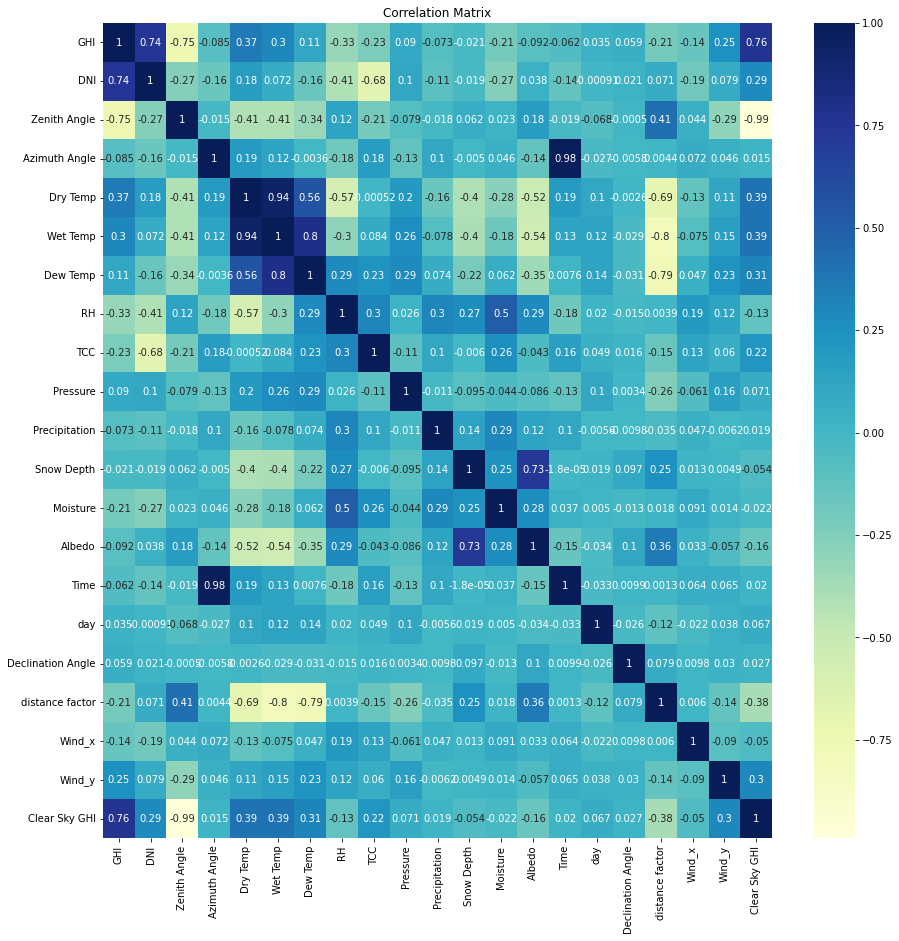

In [443]:
# Plotting correlation between every pair of columns
plt.rcParams['figure.figsize'] = [15, 15]
sns.heatmap(imputed_df.corr(),annot = True,cmap = "YlGnBu")
plt.title('Correlation Matrix')
plt.show()

### Test Data Analysis

In [ ]:
# start_time.describe()

In [ ]:
# mpl.rcParams['figure.figsize'] = (6, 6)
# start_time.hist()
# # Start time is from 4 30 am to 7 30 am

In [ ]:
end_time.describe()

In [ ]:
end_time.hist()
# # end time is 8am - 5pm

In [ ]:
# df_list[220]

In [ ]:
# (df_list[220][df_list[0].columns[2]]).plot()

In [ ]:
# length.describe()

## Split data and Normalize

In [ ]:
# !pip install sklearn

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

In [10]:
cleaned_df = pd.read_csv('cleaned_df.csv')
imputed_df = pd.read_csv('imputed_df.csv')

In [11]:
from datetime import date
def calc_time(time):
    return int(time.split(':')[0])*60 + int(time.split(':')[1])
def calc_day(day):
    x = date(int(day.split('/')[2]), int(day.split('/')[0]),int(day.split('/')[1]))
    if(day.split('/')[2]=='2017'):
        return x.timetuple().tm_yday-365+1
    if(day.split('/')[2]=='2018'):
        return x.timetuple().tm_yday
    if(day.split('/')[2]=='2019'):
        return x.timetuple().tm_yday+365
    if(day.split('/')[2]=='2020'):
        return x.timetuple().tm_yday+365*2
    if(day.split('/')[2]=='2021'):
        return x.timetuple().tm_yday+365*3+1
def test_calc_day(day):
    x = date(int(day.split('/')[0]), int(day.split('/')[1]),int(day.split('/')[2]))
    if(day.split('/')[0]=='2017'):
        return x.timetuple().tm_yday-365+1
    if(day.split('/')[0]=='2018'):
        return x.timetuple().tm_yday
    if(day.split('/')[0]=='2019'):
        return x.timetuple().tm_yday+365
    if(day.split('/')[0]=='2020'):
        return x.timetuple().tm_yday+365*2
    if(day.split('/')[0]=='2021'):
        return x.timetuple().tm_yday+365*3+1

In [12]:
del_days_list = ['3/9/2019', '11/17/2020']
del_days_list = [calc_day(i) for i in del_days_list]
del_days_list

[433, 1052]

In [13]:
df_list = [None]*300
for i in range(1,301):
    t_df = pd.read_csv('data_to_nvidia/Data_Test/{}/weather_data.csv'.format(i))
    t_df['Time'] = [calc_time(j) for j in t_df['MST']]
    t_df['day'] = [test_calc_day(j) for j in t_df['DATE (YYYY/MM/DD)']]
    df_list[i-1] = t_df

In [14]:
start_time = []
end_time = []
length = []
test_days_list = []
for t_df in df_list:
    start_time.append(t_df['Time'][0])
    length.append(len(t_df))
    end_time.append(t_df['Time'][len(t_df)-1])
    test_days_list.append(t_df['day'][0])
start_time = pd.Series(start_time)
end_time = pd.Series(end_time)
length = pd.Series(length)

test_days_list_unique = list(pd.Series(test_days_list).unique())

In [15]:
def fetch(tup):
    day,start_time,end_time = tup
    df = imputed_df[imputed_df['day']==day]
    return df.loc[(df['Time'] >= start_time) & (df['Time'] <= end_time)].reset_index(drop=True)

In [16]:
# Split into Train and Validation data

X = imputed_df['day'].unique()
from sklearn.utils import shuffle
X = shuffle(X, random_state = 9)
X = list(X)
for i in test_days_list_unique:
    X.remove(i)
for i in del_days_list:
    X.remove(i)
train_days = X[0:int(len(X)*0.85)]
val_days = X[int(len(X)*0.85):]
test_days = test_days_list_unique

def get_dataframe(dataf,days_list):
  indexes_list = []
  for day in days_list:
    indexes_list = np.append(indexes_list, dataf[dataf['day'] == day].index)
  return dataf.iloc[np.array(indexes_list).astype('int64')]

In [17]:
train_df = get_dataframe(imputed_df, train_days).drop(['MST','Date'], axis = 1)
val_df = get_dataframe(imputed_df, val_days).drop(['MST','Date'], axis = 1)
test_df = get_dataframe(imputed_df, test_days).drop(['MST','Date'], axis = 1)

a = train_df['day']
b = val_df['day']
c = test_df['day']

In [18]:
# Normalize the data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df- train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
train_df['day'] = a
val_df['day'] = b
test_df['day'] = c

In [19]:
full_test_dfs = [fetch(i).drop(['MST','Date'], axis = 1) for i in list(zip(test_days_list,start_time,end_time))]

for i in range(len(full_test_dfs)):
       full_test_dfs[i] = (full_test_dfs[i]- train_mean) / train_std

In [20]:
def create_submission(x,path):
  x.index = list(range(1,301))
  x.to_csv(path,header=['10_min_horizon','20_min_horizon','30_min_horizon','40_min_horizon','50_min_horizon', '60_min_horizon','70_min_horizon','80_min_horizon','90_min_horizon','100_min_horizon','110_min_horizon','120_min_horizon'], index=True, index_label = 'scenario_set')

In [29]:
# train_mean['GHI']*(30) /100

In [ ]:
#Ensembling

# df_nn = pd.read_csv('/content/sub.csv')
# df_loocf = pd.read_csv('/content/sub3.csv')
# x = (df_nn + df_loocf) / 2
# create_submission(x.drop('scenario_set', axis = 1),'/content/sub1.csv' )

### Using Deep Learning Models

In [ ]:
# # extract test data
# import os
# test_data = []*300
# for i in range(1,301):
#   t_df = pd.read_csv(os.path.join('/content/drive/MyDrive/Shell_ai/dataset/test', str(i), "weather_data.csv")) 
#   t_df['Total Cloud Cover [%]'].replace(-7999, np.NaN, inplace  = True)
#   t_df['Total Cloud Cover [%]'].replace(-1, np.NaN, inplace  = True)
#   t_df['Total Cloud Cover [%]'].replace(-6999, np.NaN, inplace  = True) 
#   t_df['Total Cloud Cover [%]'].fillna(method="ffill", inplace=True)
#   t_df['Total Cloud Cover [%]'].fillna(method='backfill', inplace=True)
#   t_df.drop('Time [Mins]', axis = 1, inplace = True)
#   wv = t_df.pop('Peak Wind Speed @ 6ft [m/s]')
#   # Convert to radians.
#   wd_rad = t_df.pop('Avg Wind Direction @ 6ft [deg from N]')*np.pi / 180
#   # Calculate the wind x and y components.
#   t_df['Wind_x'] = wv*np.cos(wd_rad)
#   t_df['Wind_y'] = wv*np.sin(wd_rad)
#   t_df = (t_df- train_mean.drop('day')) / train_std.drop('day')
#   test_data.append(t_df)

In [ ]:
# train_df['tcc_30'] = series.shift(-30)
# train_df['tcc_60'] = series.shift(-60)
# train_df['tcc_90'] = series.shift(-90)
# train_df['tcc_120'] = series.shift(-120)

In [13]:
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
tf.random.set_seed(42)
np.random.seed(42)

In [14]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,label_shift,
               train_df = train_df, val_df = val_df, test_df = test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift
    self.label_shift = label_shift
    self.total_window_size = input_width + shift + label_shift*(label_width - 1)

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.input_width + self.shift - 1
    self.labels_slice = slice(self.label_start, None, label_shift)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=128)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

import random
def chain(iterables):
  while True:
    random.shuffle(iterables)
    for it in iterables:
      lst = list(it)
      random.shuffle(lst)
      for element in lst:
          yield element

### Linear Model

In [ ]:
for ws in [1]:
  print("\n\nfor ws = {}".format(ws))
  grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
  iter_list_train = [ WindowGenerator(input_width=ws, label_width = 12, shift=10, label_shift = 10,train_df = grouped_df1.get_group(day).drop(['day','Wet Temp','Time'] , axis = 1)[['GHI','Azimuth Angle','TCC','Clear Sky GHI','distance factor','RH']], label_columns=['GHI']).train for day in train_df['day'].unique() ]
  # train_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
  iter_list_val = [ WindowGenerator(input_width=ws, label_width = 12, shift=10, label_shift = 10,train_df = grouped_df1.get_group(day).drop(['day','Wet Temp','Time'] , axis = 1)[['GHI','Azimuth Angle','TCC','Clear Sky GHI','distance factor','RH']], label_columns=['GHI']).train for day in val_df['day'].unique() ]
  # val_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
  iter_list_test = [ WindowGenerator(input_width=ws, label_width = 12, shift=10, label_shift = 10,train_df = grouped_df1.get_group(day).drop(['day','Wet Temp','Time'] , axis = 1)[['GHI','Azimuth Angle','TCC','Clear Sky GHI','distance factor','RH']], label_columns=['GHI']).train for day in test_df['day'].unique() ]
  # test_generator = itertools.chain.from_iterable( iter_list )

  train_batches = 0
  for x in iter_list_train:
    train_batches = train_batches + len(x)
  print(train_batches)
  val_batches = 0
  for x in iter_list_val:
    val_batches = val_batches + len(x)
  print(val_batches)

  test_batches = 0
  for x in iter_list_test:
    test_batches = test_batches + len(x)
  print(test_batches)

  train_gen = chain(iter_list_train)
  val_gen = chain(iter_list_val)
  test_gen = chain(iter_list_test)
    
  # Linear Model
  linear = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(ws, 6)),
    tf.keras.layers.Dense(units=12)
])

  callbacks = [
      EarlyStopping(monitor='val_loss', patience=3,  mode='min',verbose=1),
      ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-9, verbose=1),
      ModelCheckpoint('linear_{}.h5'.format(ws), verbose=1, save_best_only=True, save_weights_only=True) ]

  linear.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.optimizers.SGD(learning_rate=1e-2, momentum = 0.9),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = linear.fit(train_gen, steps_per_epoch = train_batches, epochs=1, validation_data = val_gen, validation_steps = val_batches, callbacks=callbacks)
  linear.evaluate(test_gen, steps = test_batches)

In [15]:
0.388*train_std['GHI']
# 112.49 is mae for linear model

116.58504530090028

In [ ]:
0.3746*train_std['GHI']
# 112.96(imputed_df) is mae for linear model

In [ ]:
plt.bar(x = range(6),
        height=linear.layers[1].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(6))
_ = axis.set_xticklabels(['GHI','Azimuth Angle','TCC','Clear Sky GHI','distance factor','RH'], rotation=90)

### Wandb

In [16]:
import wandb
from tensorflow import keras
from wandb.keras import WandbCallback
wandb.login()

wandb: Currently logged in as: akhila (use `wandb login --relogin` to force relogin)


True

In [17]:
l1 = ['GHI',
 'DNI',
 'Azimuth Angle',
 'Dry Temp',
 'Dew Temp',
 'RH',
 'TCC',
 'Pressure',
 'Precipitation',
 'Snow Depth',
 'Moisture',
 'Albedo',
 'day',
 'Declination Angle',
 'distance factor',
 'Wind_x',
 'Wind_y',
 'Clear Sky GHI']

l2 = ['GHI',
 'DNI',
 'Azimuth Angle',
 'Dry Temp',
 'Dew Temp',
 'RH',
 'TCC',
 'Pressure',
 'Precipitation',
 'Moisture',
 'Wind_x',
 'Wind_y',
 'distance factor',
 'Clear Sky GHI']

l3 = ['GHI',
       'DNI',
 'Azimuth Angle',
 'Dry Temp',
 'RH',
 'Pressure',
 'TCC',
 'Precipitation',
 'distance factor',
 'Clear Sky GHI']


l4 = ['GHI',
 'Azimuth Angle',
 'TCC',
 'distance factor',
 'Clear Sky GHI']

l = [l1,l2,l3,l4]


### MLP

In [ ]:
def Model(units_1,units_2):

    mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = units_1, activation='leaky_relu'),
    tf.keras.layers.Dense(units = units_2, activation='leaky_relu'),
    tf.keras.layers.Dense(units=12),
  ])
    return mlp_model

In [ ]:
# mpl.rcParams['figure.figsize'] = (6,6)   
# x = imputed_df.groupby(['day'], sort = False, as_index = False)
# x.get_group(73)['GHI'].plot()

In [ ]:
# x.get_group(73)[200:200+350]['GHI'].plot()

In [ ]:
# x.get_group(73)[::5]['GHI'].plot()

In [ ]:
sweep_config = {
  'method': 'grid', 
  'metric': {
      'name': 'val_loss',
      'goal': 'minimize'
  },
  'early_terminate':{
      'type': 'hyperband',
      'min_iter': 2,
      'eta': 2
    },

  'parameters': {
      'learning_rate':{
          'values': [1e-2]
      },
      'sr_nd_ws':{
          'values': [[10,12]]
      },
      'units_1':{
          'values': [256]
      },
      'units_2':{
          'values': [32]
      },
      'cols_list':{
          'values': [2,3]
      },
      'optimizers':{
          'values': [0]
      },
      'loss':{
          'values': [0]
      }
    },
                     
 }

In [ ]:
def sweep_train():
    # Specify the hyperparameter to be tuned along with
    # an initial value
    config_defaults = {
        'learning_rate': 0.001
    }

    # Initialize wandb with a sample project name
    wandb.init(config=config_defaults)  # this gets over-written in the Sweep
    cfg = wandb.config
    # Specify the other hyperparameters to the configuration, if any
#     cfg.epochs = 30
#     cfg.architecture_name = "Huber_MLP"

    grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
    iter_list_train = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 12, shift=10//cfg.sr_nd_ws[0], label_shift = 10//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]][l[cfg.cols_list]],label_columns=['GHI']).train for day in train_df['day'].unique() ]

    grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
    iter_list_val = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 12, shift=10//cfg.sr_nd_ws[0], label_shift = 10//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]][l[cfg.cols_list]],label_columns=['GHI']).train for day in val_df['day'].unique() ]

    grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
    iter_list_test = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 12, shift=10//cfg.sr_nd_ws[0], label_shift = 10//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]][l[cfg.cols_list]],label_columns=['GHI']).train for day in test_df['day'].unique() ]

    train_batches = 0
    for x in iter_list_train:
      train_batches = train_batches + len(x)
    print(train_batches)
    val_batches = 0
    for x in iter_list_val:
      val_batches = val_batches + len(x)
    print(val_batches)

    test_batches = 0
    for x in iter_list_test:
      test_batches = test_batches + len(x)
    print(test_batches)

    train_gen = chain(iter_list_train)
    val_gen = chain(iter_list_val)
    test_gen = chain(iter_list_test)

    # initialize model
    model = Model(cfg.units_1,cfg.units_2)
    
#     sgd = tf.keras.optimizers.SGD(lr=cfg.learning_rate, momentum = 0.9)
#     adam = tf.keras.optimizers.Adam(lr=cfg.learning_rate)
#     opt = [sgd,adam]
#     losses = ['mae','mse']
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=cfg.learning_rate, momentum = 0.9),loss=tf.keras.losses.Huber(),metrics=[tf.metrics.MeanAbsoluteError()])

    callbacks = [
        EarlyStopping(monitor='val_loss', patience = 3,  mode='min'),
        ReduceLROnPlateau(factor=0.25, patience = 2, verbose=1),
        ModelCheckpoint('MLP_l:{}_sr:{}_ws:{}_u1:{}_u2:{}_cols:{}.h5'.format(cfg.learning_rate, cfg.sr_nd_ws[0],cfg.sr_nd_ws[1], cfg.units_1, cfg.units_2,cfg.cols_list), verbose=1, save_best_only=True, save_weights_only=True) ]

  
    # train and validate
    history = model.fit(train_gen, steps_per_epoch = train_batches, epochs=30, validation_data = val_gen, validation_steps = val_batches,callbacks = [WandbCallback(),callbacks])

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="shell_hack-level-2")

In [ ]:
wandb.agent(sweep_id, function=sweep_train, count = 48)

In [ ]:
for ws in [1]:
  print("\n\nfor ws = {}".format(ws))
  grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
  iter_list_train = [ WindowGenerator(input_width=ws, label_width = 12, shift=10, label_shift = 10,train_df = grouped_df1.get_group(day)[120:].drop(['Wet Temp','Time'] , axis = 1)[['GHI','Azimuth Angle','TCC','Clear Sky GHI','distance factor']], label_columns=['GHI']).train for day in train_df['day'][:len(train_df['day'])//2].unique() ]\
  + [ WindowGenerator(input_width=ws, label_width = 12, shift=10, label_shift = 10,train_df = grouped_df1.get_group(day)[160:-160].drop(['Wet Temp','Time'] , axis = 1)[['GHI','Azimuth Angle','TCC','Clear Sky GHI','distance factor']], label_columns=['GHI']).train for day in train_df['day'][len(train_df['day'])//2:].unique() ]

  # train_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
  iter_list_val = [ WindowGenerator(input_width=ws, label_width = 12, shift=10, label_shift = 10,train_df = grouped_df1.get_group(day)[120:].drop(['Wet Temp','Time'] , axis = 1)[['GHI','Azimuth Angle','TCC','Clear Sky GHI','distance factor']], label_columns=['GHI']).train for day in val_df['day'][:len(val_df['day'])//2].unique() ]+ [ WindowGenerator(input_width=ws, label_width = 12, shift=10, label_shift = 10,train_df = grouped_df1.get_group(day)[160:-160].drop(['Wet Temp','Time'] , axis = 1)[['GHI','Azimuth Angle','TCC','Clear Sky GHI','distance factor']], label_columns=['GHI']).train for day in val_df['day'][len(val_df['day'])//2:].unique() ]

  # val_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
  iter_list_test = [ WindowGenerator(input_width=ws, label_width = 12, shift=10, label_shift = 10,train_df = grouped_df1.get_group(day)[120:].drop(['Wet Temp','Time'] , axis = 1)[['GHI','Azimuth Angle','TCC','Clear Sky GHI','distance factor']], label_columns=['GHI']).train for day in test_df['day'][:len(test_df['day'])//2].unique() ]+ [ WindowGenerator(input_width=ws, label_width = 12, shift=10, label_shift = 10,train_df = grouped_df1.get_group(day)[160:-160].drop(['Wet Temp','Time'] , axis = 1)[['GHI','Azimuth Angle','TCC','Clear Sky GHI','distance factor']], label_columns=['GHI']).train for day in test_df['day'][len(test_df['day'])//2:].unique() ]

  # test_generator = itertools.chain.from_iterable( iter_list )

  train_batches = 0
  for x in iter_list_train:
    train_batches = train_batches + len(x)
  print(train_batches)
  val_batches = 0
  for x in iter_list_val:
    val_batches = val_batches + len(x)
  print(val_batches)

  test_batches = 0
  for x in iter_list_test:
    test_batches = test_batches + len(x)
  print(test_batches)

  train_gen = chain(iter_list_train)
  val_gen = chain(iter_list_val)
  test_gen = chain(iter_list_test)
    
  # MLP Model
  model = tf.keras.Sequential([
tf.keras.layers.Flatten(inpuyt),
tf.keras.layers.Dense(units = 256, activation='leaky_relu'),
tf.keras.layers.Dense(units = 32, activation='leaky_relu'),
tf.keras.layers.Dense(units=12),
])


  callbacks = [
      EarlyStopping(monitor='val_loss', patience=3,  mode='min',verbose=1),
      ReduceLROnPlateau(factor=0.15, patience=2, min_lr=1e-9, verbose=1),
      ModelCheckpoint('MLP_{}_gaussian.h5'.format(ws), verbose=1, save_best_only=True, save_weights_only=True) ]

  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=tf.optimizers.SGD(learning_rate=1e-3, momentum = 0.9),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(train_gen, steps_per_epoch = train_batches, epochs=25, validation_data = val_gen, validation_steps = val_batches, callbacks=callbacks)
  model.evaluate(test_gen, steps = test_batches)

In [18]:
sr = 10
for ws in [12]:
    grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
    iter_list_train = [ WindowGenerator(input_width=ws, label_width = 12, shift=10//sr, label_shift = 10//sr,train_df = grouped_df1.get_group(day)[::sr][l[2]],label_columns=['GHI']).train for day in train_df['day'].unique() ]

    grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
    iter_list_val = [ WindowGenerator(input_width=ws, label_width = 12, shift=10//sr, label_shift = 10//sr,train_df = grouped_df1.get_group(day)[::sr][l[2]],label_columns=['GHI']).train for day in val_df['day'].unique() ]

    grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
    iter_list_test = [ WindowGenerator(input_width=ws, label_width = 12, shift=10//sr, label_shift = 10//sr,train_df = grouped_df1.get_group(day)[::sr][l[2]],label_columns=['GHI']).train for day in test_df['day'].unique() ]
    # test_generator = itertools.chain.from_iterable( iter_list )

    train_batches = 0
    for x in iter_list_train:
        train_batches = train_batches + len(x)
    print(train_batches)
    val_batches = 0
    for x in iter_list_val:
        val_batches = val_batches + len(x)
    print(val_batches)

    test_batches = 0
    for x in iter_list_test:
        test_batches = test_batches + len(x)
    print(test_batches)

    train_gen = chain(iter_list_train)
    val_gen = chain(iter_list_val)
    test_gen = chain(iter_list_test)
    print('78')
    # MLP Model
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 64, activation='leaky_relu'),
    tf.keras.layers.Dense(units = 64, activation='leaky_relu'),
    tf.keras.layers.Dense(units=12),
    ])


    callbacks = [
      EarlyStopping(monitor='val_loss', patience=3,  mode='min',verbose=1),
      ReduceLROnPlateau(factor=0.15, patience=2, min_lr=1e-9, verbose=1),
      ModelCheckpoint('MLP_{}_gaussian.h5'.format(ws), verbose=1, save_best_only=True, save_weights_only=True) ]

    model.compile(loss=tf.keras.losses.Huber(),
                optimizer=tf.optimizers.SGD(learning_rate=1e-4, momentum = 0.9),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(train_gen, steps_per_epoch = train_batches, epochs=25, validation_data = val_gen, validation_steps = val_batches, callbacks=callbacks)
    model.evaluate(test_gen, steps = test_batches)

2021-11-29 03:38:56.169322: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14659 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:89:00.0, compute capability: 7.0


1010
179
258
78


2021-11-29 03:39:38.882856: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
 466/1010 [============>.................] - ETA: 15s - loss: 0.5605 - mean_absolute_error: 0.9579

KeyboardInterrupt: 

In [19]:
 # MLP Model
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape = (12,len(l[2]))),
tf.keras.layers.Dense(units = 256, activation='leaky_relu'),
tf.keras.layers.Dense(units = 32, activation='leaky_relu'),
tf.keras.layers.Dense(units=12),
])


model.compile(loss=tf.keras.losses.Huber(),
                optimizer=tf.optimizers.SGD(learning_rate=1e-2, momentum = 0.9),
                metrics=[tf.metrics.MeanAbsoluteError()])

In [120]:
def get_test_predictions(model, ws,features_list,sr) :

  X = np.zeros((300,ws,len(features_list)))
  for i in range(300):  
    X[i] = np.array(full_test_dfs[i][(len(full_test_dfs[i])-1)%sr::sr][-ws:][features_list])
  output = model.predict(X)
  output = output.reshape(300,12)
  output = pd.DataFrame(output)
#     print(output)
  output = output*train_std.loc['GHI'] + train_mean.loc['GHI']
  for i in range(300):
    for j in range(4):
      if(output.iloc[i][j] < -1):
          output.iloc[i][j] = -0.8
  create_submission(pd.DataFrame(np.array(output)),'predictions_ws_{}sr_{}cols_{}.csv'.format(ws,sr,len(features_list)))
  return output

In [85]:
len(l[2])

10

In [20]:
model.built = True
model.load_weights('MLP_l:0.01_sr:10_ws:12_u1:256_u2:32_cols:2.h5')
model.evaluate(test_gen, steps = test_batches)

258/258 [==============================] - 8s 30ms/step - loss: 0.1358 - mean_absolute_error: 0.3468


[0.13581611216068268, 0.3468441963195801]

In [122]:
get_test_predictions(model,12,l[2],10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,571.692444,520.023804,477.577942,452.150085,409.350067,360.658722,331.591980,278.519073,277.890045,234.580368,183.274048,151.801605
1,855.064758,850.486694,828.505066,840.300049,829.398987,816.367065,811.759888,782.214111,778.978943,770.515381,754.991211,745.570557
2,344.270416,345.577087,326.850067,289.011139,270.104736,242.541077,240.598557,188.276581,173.957077,129.404510,145.929367,117.757812
3,569.413940,595.022705,624.385498,651.002930,664.455383,665.351379,663.403748,693.417358,712.448730,688.651550,713.611816,722.461304
4,902.727783,882.399048,879.116394,859.115601,838.110107,837.037048,820.426270,800.034607,786.966431,778.664551,754.102722,734.170532
...,...,...,...,...,...,...,...,...,...,...,...,...
295,876.701294,846.436401,828.460388,800.426514,797.417725,770.144104,734.473511,705.780212,714.031372,681.304077,655.753662,629.704224
296,414.071472,450.689453,459.699829,491.601807,537.084351,525.165344,544.124512,557.633545,586.152710,606.387390,618.006714,618.921143
297,673.488708,701.377747,731.072632,753.507019,762.875732,798.588989,802.470459,813.457886,833.104492,843.461304,846.483887,843.396729
298,144.397064,170.748764,190.533142,180.715408,207.322464,196.496689,191.178589,190.939240,204.191940,214.645645,188.278702,187.434662


In [111]:
mpl.rcParams['figure.figsize'] = (8,8)
day = 100
grouped_imputed_df = imputed_df.groupby(['day'], sort = False, as_index = False)
def plot(i):
    pd.Series(x.iloc[i].values , index=range(len(full_test_dfs[i])+10,len(full_test_dfs[i])+121,10)).plot()
    (grouped_imputed_df.get_group(test_days_list[i])['GHI'].reset_index(drop = True)).plot()

### CNN

In [118]:
def Model(filters,kernel_size,ws,i,units_1):

    model =   tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=filters,kernel_size=kernel_size,activation='relu'
                               ,input_shape=(ws,len(l[i]))),
        tf.keras.layers.MaxPooling1D(pool_size = 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=units_1, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=12),
    ])
    model.summary()
    return model

# model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=3, activation= ' relu ' ,
# input_shape=(n_timesteps,n_features)))
# model.add(Conv1D(filters=32, kernel_size=3, activation= ' relu ' ))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=16, kernel_size=3, activation= ' relu ' ))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(100, activation= ' relu ' ))
# model.add(Dense(n_outputs))

In [138]:
sweep_config = {
  'method': 'random', 
  'metric': {
      'name': 'val_loss',
      'goal': 'minimize'
  },

  'parameters': {
      'learning_rate':{
          'values': [0.01,0.001,0.0001]
      },
      'sr_nd_ws':{
          'values': [[10,12],[10,6],[10,4]]
      },
      'filters':{
          'values': [8,16,32,64]
      },
      'kernel_size':{
          'values': [2,3,3,3,4,5,6]
      },
      'cols_list':{
          'values': [0,1,2,3,4]
      },
      'units':{
          'values': [1,4,8,16,32]
      },
  }
}

In [139]:
def sweep_train():
    # Specify the hyperparameter to be tuned along with
    # an initial value
    config_defaults = {
        'learning_rate': 0.001,
        'sr nd ws': [10,3],
      'filters':128,
      'kernel_size': 64,
      'cols_list': [0],
        'units': 8
    }

    # Initialize wandb with a sample project name
    wandb.init(config=config_defaults)  # this gets over-written in the Sweep
    cfg = wandb.config
    # Specify the other hyperparameters to the configuration, if any
    cfg.epochs = 55
    cfg.architecture_name = "CNN"

    grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
    iter_list_train = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 12, shift=10//cfg.sr_nd_ws[0], label_shift = 10//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]][l[cfg.cols_list]],label_columns=['GHI']).train for day in train_df['day'].unique() ]

    grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
    iter_list_val = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 12, shift=10//cfg.sr_nd_ws[0], label_shift = 10//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]][l[cfg.cols_list]],label_columns=['GHI']).train for day in val_df['day'].unique() ]

    grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
    iter_list_test = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 12, shift=10//cfg.sr_nd_ws[0], label_shift = 10//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]][l[cfg.cols_list]],label_columns=['GHI']).train for day in test_df['day'].unique() ]

    train_batches = 0
    for x in iter_list_train:
      train_batches = train_batches + len(x)
    print(train_batches)
    val_batches = 0
    for x in iter_list_val:
      val_batches = val_batches + len(x)
    print(val_batches)

    test_batches = 0
    for x in iter_list_test:
      test_batches = test_batches + len(x)
    print(test_batches)

    train_gen = chain(iter_list_train)
    val_gen = chain(iter_list_val)
    test_gen = chain(iter_list_test)

    # initialize model
    model = Model(cfg.filters, cfg.kernel_size, cfg.sr_nd_ws[1],cfg.cols_list,cfg.units)
    
    model.compile(optimizer=tf.optimizers.Adam(learning_rate = cfg.learning_rate),loss=tf.keras.losses.MeanAbsoluteError())

    callbacks = [
        EarlyStopping(monitor='val_loss', patience = 5,  mode='min'),
        ReduceLROnPlateau(factor=0.5, patience = 3, verbose=1),
        ModelCheckpoint('MLP_l:{}_sr:{}_ws:{}_u1:{}_u2:{}_cols:{}units:{}.h5'.format(cfg.learning_rate, cfg.sr_nd_ws[0],cfg.sr_nd_ws[1], cfg.filters, cfg.kernel_size, cfg.cols_list,cfg.units), verbose=1, save_best_only=True, save_weights_only=True) ]

  
    # train and validate
    history = model.fit(train_gen, steps_per_epoch = train_batches, epochs=cfg.epochs, validation_data = val_gen, validation_steps = val_batches,callbacks = [WandbCallback(),callbacks])

In [140]:
sweep_id = wandb.sweep(sweep_config, project="shell_hack-level-2")

Create sweep with ID: 9a0mx58u
Sweep URL: https://wandb.ai/akhila/shell_hack-level-2/sweeps/9a0mx58u


In [ ]:
wandb.agent(sweep_id, function=sweep_train, count = 500)

wandb: Agent Starting Run: 2yeyl4vh with config:
wandb: 	cols_list: 0
wandb: 	filters: 8
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 8


1379
248
360


wandb: ERROR Run 2yeyl4vh errored: ValueError('Negative dimension size caused by subtracting 5 from 4 for \'{{node conv1d/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d/conv1d/ExpandDims, conv1d/conv1d/ExpandDims_1)\' with input shapes: [?,1,4,18], [1,5,18,8].')
wandb: Agent Starting Run: bgw67jai with config:
wandb: 	cols_list: 1
wandb: 	filters: 8
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 32


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 8)              344       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▃▅▆▇█
loss,█▄▃▅▄▁▁
val_loss,▆▁▇█▆▄▇
best_epoch,1
best_val_loss,0.52734
epoch,6
loss,0.5204
val_loss,0.56407


wandb: Agent Starting Run: 2nii5xla with config:
wandb: 	cols_list: 0
wandb: 	filters: 64
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 1


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             3520      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▆▆▆▄▇▅▄▃▅▆▁▂▂▁
val_loss,▇▆▃▂█▁▇▁█▁▇▁▅▄▅
best_epoch,9
best_val_loss,0.80554
epoch,14
loss,0.80885
val_loss,0.81294


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rykprfds with config:
wandb: 	cols_list: 1
wandb: 	filters: 16
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 32


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 16)             688       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
loss,█▆▅▆▇▆▆▆▆▆▆▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁
val_loss,█▄▄▄▃▃▄▃▄▃▃▂▂▂▂▂▃▂▂▂▁▁▁▂▂▁
best_epoch,20
best_val_loss,0.39262
epoch,25
loss,0.46479
val_loss,0.39568


wandb: Agent Starting Run: 20g9cqcj with config:
wandb: 	cols_list: 3
wandb: 	filters: 16
wandb: 	kernel_size: 4
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 1


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 16)             464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇███
loss,█▇▇▇▆▆▅▄▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,███▇▆▆▅▅▄▃▃▂▂▂▂▂▁▂▂▂▁▁▁▁▁▁▂▁▁▁▁▁▁
best_epoch,27
best_val_loss,0.58638
epoch,32
loss,0.64185
val_loss,0.58925


wandb: Agent Starting Run: qmaoj8jy with config:
wandb: 	cols_list: 2
wandb: 	filters: 32
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 1


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 32)             896       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
loss,█▇▇▆▅▅▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▆▅▄▄▃▃▂▂▂▂▂▂▂▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁
best_epoch,31
best_val_loss,0.5459
epoch,36
loss,0.60761
val_loss,0.55174


wandb: Agent Starting Run: 8cvi2ehq with config:
wandb: 	cols_list: 3
wandb: 	filters: 8
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 4


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 8)              288       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
loss,█▆▅▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▅▄▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,20
best_val_loss,0.51383
epoch,25
loss,0.58558
val_loss,0.52396


wandb: Agent Starting Run: gpq7wxvu with config:
wandb: 	cols_list: 2
wandb: 	filters: 8
wandb: 	kernel_size: 2
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 32


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 8)              152       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
loss,█▆▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▃▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁
best_epoch,19
best_val_loss,0.48356
epoch,24
loss,0.46933
val_loss,0.48904


wandb: Agent Starting Run: nvkx6fg6 with config:
wandb: 	cols_list: 2
wandb: 	filters: 32
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 4


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 32)             1472      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 132       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1334/1334 [==============================] - 39s 29ms/step - loss: 0.5091 - val_loss: 0.4529

Epoch 00008: val_loss did not improve from 0.44254
Epoch 9/55
1334/1334 [==============================] - 40s 30ms/step - loss: 0.5074 - val_loss: 0.4477

Epoch 00009: val_loss did not improve from 0.44254
Epoch 10/55
1334/1334 [==============================] - 38s 28ms/step - loss: 0.5045 - val_loss: 0.4414

Epoch 00010: val_loss improved from 0.44254 to 0.44138, saving model to MLP_l:0.001_sr:10_ws:6_u1:32_u2:5_cols:2units:4.h5
Epoch 11/55
1334/1334 [==============================] - 40s 30ms/step - loss: 0.5060 - val_loss: 0.4418

Epoch 00011: val_loss did not improve from 0.44138
Epoch 12/55
1334/1334 [==============================] - 38s 29ms/step - loss: 0.5062 - val_loss: 0.4469

Epoch 00012: val_loss did not improve from 0.44138
Epoch 13/55
1334/1334 [==============================] - 38s 28ms/step - loss: 0.5056 - val_loss: 0.4357

Epoch 00013: val_loss improved from 0.44138 to 0.4

epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
loss,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▄▃▄▄▃▃▃▃▃▃▂▃▂▁▂▃▁▂▁
best_epoch,15
best_val_loss,0.42353
epoch,20
loss,0.49898
val_loss,0.42606


wandb: Agent Starting Run: oy5d8ysi with config:
wandb: 	cols_list: 1
wandb: 	filters: 8
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 32


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 8)              344       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▂▃▄▄▅▅▆▇▇█
loss,█▅▄▃▂▂▂▁▁▁▁▁
val_loss,█▅▂▁▁▁▁▁▁▁▁▁
best_epoch,6
best_val_loss,0.56071
epoch,11
loss,0.52841
val_loss,0.56447


wandb: Agent Starting Run: cyu4c8gw with config:
wandb: 	cols_list: 3
wandb: 	filters: 64
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 1


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 64)             2304      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▃▄▅▅▆▇█
loss,▅▄▃▅█▃▄▁▂
val_loss,▅▄▂▁▆▄▂▇█
best_epoch,3
best_val_loss,0.84237
epoch,8
loss,0.83922
val_loss,0.85481


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dh2df2t0 with config:
wandb: 	cols_list: 4
wandb: 	filters: 32
wandb: 	kernel_size: 4
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 4


1379
248
360


wandb: ERROR Run dh2df2t0 errored: ValueError('Negative dimension size caused by subtracting 2 from 1 for \'{{node max_pooling1d/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d/ExpandDims)\' with input shapes: [?,1,1,32].')
wandb: Agent Starting Run: d1gsst9w with config:
wandb: 	cols_list: 0
wandb: 	filters: 8
wandb: 	kernel_size: 4
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 16


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 8)              584       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▂▃▄▄▅▅▆▇▇█
loss,█▂▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▂▆▁▁▂▂▂▂
best_epoch,6
best_val_loss,0.84781
epoch,11
loss,0.84151
val_loss,0.85184


wandb: Agent Starting Run: a0ylnc3z with config:
wandb: 	cols_list: 2
wandb: 	filters: 8
wandb: 	kernel_size: 4
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 8


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 8)              296       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇███
loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁
best_epoch,28
best_val_loss,0.46145
epoch,33
loss,0.52384
val_loss,0.47423


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lq6uglmw with config:
wandb: 	cols_list: 4
wandb: 	filters: 8
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 32


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 8)              248       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 24)                0         
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
loss,█▅▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
val_loss,█▅▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,15
best_val_loss,0.44708
epoch,20
loss,0.48503
val_loss,0.46031


wandb: Agent Starting Run: 42dp6o1t with config:
wandb: 	cols_list: 4
wandb: 	filters: 32
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 1


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 32)             512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁
val_loss,█▆▅▄▃▃▂▂▂▂▂▁▂▁▁▁▁▁▁
best_epoch,13
best_val_loss,0.56323
epoch,18
loss,0.60999
val_loss,0.56639


wandb: Agent Starting Run: 67xrz1ks with config:
wandb: 	cols_list: 3
wandb: 	filters: 64
wandb: 	kernel_size: 2
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 1


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 64)            960       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dropout (Dropout)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 321       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
loss,█▃▂▂▁▁▁▁▁▁▁▁▁
val_loss,█▅▃▃▄▄▂▁▂▂▂▂▂
best_epoch,7
best_val_loss,0.57859
epoch,12
loss,0.64611
val_loss,0.59016


wandb: Agent Starting Run: kj80b6a9 with config:
wandb: 	cols_list: 3
wandb: 	filters: 16
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 16


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 16)             352       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
loss,█▅▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▃▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁
best_epoch,13
best_val_loss,0.47358
epoch,18
loss,0.49755
val_loss,0.49125


wandb: Agent Starting Run: hkc6stwr with config:
wandb: 	cols_list: 1
wandb: 	filters: 32
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 4


1379
248
360


wandb: ERROR Run hkc6stwr errored: ValueError('Negative dimension size caused by subtracting 5 from 4 for \'{{node conv1d/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d/conv1d/ExpandDims, conv1d/conv1d/ExpandDims_1)\' with input shapes: [?,1,4,14], [1,5,14,32].')
wandb: Agent Starting Run: g1kixbjo with config:
wandb: 	cols_list: 0
wandb: 	filters: 64
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 32


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             3520      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▅▅▅▅▅▄▄▅▃▄▅▁▅▂▅▅▄
best_epoch,13
best_val_loss,0.80226
epoch,18
loss,0.81177
val_loss,0.81233


wandb: Agent Starting Run: ruk9xp6q with config:
wandb: 	cols_list: 3
wandb: 	filters: 32
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 1


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 32)             704       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇██
loss,█▇▅▅▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▄▃▃▃▂▂▂▂▂▂▂▁▂▂▁▂▁▁▁▁
best_epoch,18
best_val_loss,0.55732
epoch,23
loss,0.61407
val_loss,0.56213


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8zjquc2w with config:
wandb: 	cols_list: 4
wandb: 	filters: 32
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 16


1334
236
350


wandb: ERROR Run 8zjquc2w errored: ValueError('Negative dimension size caused by subtracting 2 from 1 for \'{{node max_pooling1d/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d/ExpandDims)\' with input shapes: [?,1,1,32].')
wandb: Agent Starting Run: r4t0scmo with config:
wandb: 	cols_list: 2
wandb: 	filters: 64
wandb: 	kernel_size: 4
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 8


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 64)             2368      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 2056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
loss,█▆▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▅▄▃▃▃▂▂▂▂▂▁▂▁▂▁▁▂▁▁▁▁▁▁▁
best_epoch,20
best_val_loss,0.42314
epoch,25
loss,0.49071
val_loss,0.43645


wandb: Agent Starting Run: 99mqwow2 with config:
wandb: 	cols_list: 3
wandb: 	filters: 16
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 1


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 16)             576       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▃▄▅▆▇█
loss,█▄▃▃▃▃▂▁
val_loss,▂▄▁▅█▄▁▄
best_epoch,2
best_val_loss,0.59017
epoch,7
loss,0.65165
val_loss,0.61374


wandb: Agent Starting Run: pox5bs7d with config:
wandb: 	cols_list: 0
wandb: 	filters: 64
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 8


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             5824      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▅▆▅▄▆▄▄▆▁▆▆▃▃▅
best_epoch,10
best_val_loss,0.80122
epoch,15
loss,0.78611
val_loss,0.81808


wandb: Agent Starting Run: i4v0jcc0 with config:
wandb: 	cols_list: 2
wandb: 	filters: 16
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 4


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 16)             880       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 48)                0         
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 196       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    


Epoch 00034: val_loss improved from 0.48283 to 0.48161, saving model to MLP_l:0.0001_sr:10_ws:12_u1:16_u2:6_cols:2units:4.h5
Epoch 35/55
1173/1173 [==============================] - 38s 32ms/step - loss: 0.5448 - val_loss: 0.4857

Epoch 00035: val_loss did not improve from 0.48161
Epoch 36/55
1173/1173 [==============================] - 37s 32ms/step - loss: 0.5434 - val_loss: 0.4820

Epoch 00036: val_loss did not improve from 0.48161
Epoch 37/55
1173/1173 [==============================] - 38s 32ms/step - loss: 0.5406 - val_loss: 0.4857

Epoch 00037: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 00037: val_loss did not improve from 0.48161
Epoch 38/55
1173/1173 [==============================] - 37s 32ms/step - loss: 0.5427 - val_loss: 0.4820

Epoch 00038: val_loss did not improve from 0.48161
Epoch 39/55
1173/1173 [==============================] - 38s 32ms/step - loss: 0.5415 - val_loss: 0.4882

Epoch 00039: val_loss did not improve from 0.48161


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▇▆▆▅▅▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▇▆▅▄▄▃▃▂▂▂▂▂▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,33
best_val_loss,0.48161
epoch,38
loss,0.54148
val_loss,0.48822


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4vmg5aij with config:
wandb: 	cols_list: 1
wandb: 	filters: 16
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 16


1379
248
360


wandb: ERROR Run 4vmg5aij errored: ValueError('Negative dimension size caused by subtracting 6 from 4 for \'{{node conv1d/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d/conv1d/ExpandDims, conv1d/conv1d/ExpandDims_1)\' with input shapes: [?,1,4,14], [1,6,14,16].')
wandb: Agent Starting Run: kiwwnsfd with config:
wandb: 	cols_list: 3
wandb: 	filters: 16
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 4


1334
236
350


wandb: ERROR Run kiwwnsfd errored: ValueError('Negative dimension size caused by subtracting 2 from 1 for \'{{node max_pooling1d/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d/ExpandDims)\' with input shapes: [?,1,1,16].')
wandb: Agent Starting Run: ha4lr75y with config:
wandb: 	cols_list: 1
wandb: 	filters: 32
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 4


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 32)             1376      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 132       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇██
loss,█▅▄▄▆▃▃▃▃▃▂▂▂▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▅▇▆▅▄▄▅▃▂▃▃▃▂▄▃▄▃▂▃▂▁▃▂▂▂▃
best_epoch,22
best_val_loss,0.41738
epoch,27
loss,0.50224
val_loss,0.439


wandb: Agent Starting Run: 4ck01gig with config:
wandb: 	cols_list: 1
wandb: 	filters: 8
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 8


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 8)              344       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
loss,█▃▂▂▁▁▁▁▁▁▁▁▁
val_loss,█▆▄▄▂▄▄▁▅▄▄▂▂
best_epoch,7
best_val_loss,0.50955
epoch,12
loss,0.523
val_loss,0.52037


wandb: Agent Starting Run: ooerozs4 with config:
wandb: 	cols_list: 2
wandb: 	filters: 8
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 32


1379
248
360


wandb: ERROR Run ooerozs4 errored: ValueError('Negative dimension size caused by subtracting 6 from 4 for \'{{node conv1d/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d/conv1d/ExpandDims, conv1d/conv1d/ExpandDims_1)\' with input shapes: [?,1,4,9], [1,6,9,8].')
wandb: Agent Starting Run: 2gz0ll10 with config:
wandb: 	cols_list: 4
wandb: 	filters: 8
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 4


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 8)             128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 164       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

1173/1173 [==============================] - 35s 30ms/step - loss: 0.5740 - val_loss: 0.5161

Epoch 00035: val_loss did not improve from 0.51158
Epoch 36/55
1173/1173 [==============================] - 35s 30ms/step - loss: 0.5728 - val_loss: 0.5222

Epoch 00036: val_loss did not improve from 0.51158


epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
loss,█▇▇▆▆▆▅▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█████▇▅▄▃▃▂▂▂▂▂▂▁▁▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,30
best_val_loss,0.51158
epoch,35
loss,0.57278
val_loss,0.52224


wandb: Agent Starting Run: egi9b9sa with config:
wandb: 	cols_list: 0
wandb: 	filters: 32
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 8


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 32)             1760      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇███
loss,█▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██████████████████▅▅▄▄▄▃▄▃▄▁▁▂▁▁▁
best_epoch,27
best_val_loss,0.49781
epoch,32
loss,0.55973
val_loss,0.51681


wandb: Agent Starting Run: 5472vuad with config:
wandb: 	cols_list: 0
wandb: 	filters: 64
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 1


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 64)             6976      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dropout (Dropout)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 193       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▇▆▅▆▄▆▄▅▂▄▄▆▁▃█▂▅▄
best_epoch,14
best_val_loss,0.83192
epoch,19
loss,0.83905
val_loss,0.84514


wandb: Agent Starting Run: wkxaunmo with config:
wandb: 	cols_list: 4
wandb: 	filters: 16
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 1


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 16)             256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▄▃▄▃▄▃▃▂▂▂▂▂▁▂▂▂▂▁▂
val_loss,█▆█▇▄▅▅▆▄▃▄▃▆▃▁▃▄▃▃▅
best_epoch,14
best_val_loss,0.56388
epoch,19
loss,0.65014
val_loss,0.59563


wandb: Agent Starting Run: e92dxz5c with config:
wandb: 	cols_list: 4
wandb: 	filters: 16
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 1


1379
248
360


wandb: ERROR Run e92dxz5c errored: ValueError('Negative dimension size caused by subtracting 6 from 4 for \'{{node conv1d/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d/conv1d/ExpandDims, conv1d/conv1d/ExpandDims_1)\' with input shapes: [?,1,4,5], [1,6,5,16].')
wandb: Agent Starting Run: qgya4q0a with config:
wandb: 	cols_list: 4
wandb: 	filters: 32
wandb: 	kernel_size: 2
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 8


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 32)             352       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
loss,█▅▄▄▄▃▃▃▃▃▄▁▁
val_loss,▅▄▄▄▃▅▆▁▃█▃▄▃
best_epoch,7
best_val_loss,0.42912
epoch,12
loss,0.49862
val_loss,0.45708


wandb: Agent Starting Run: ghk60rco with config:
wandb: 	cols_list: 2
wandb: 	filters: 8
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 8


1379
248
360


wandb: ERROR Run ghk60rco errored: ValueError('Negative dimension size caused by subtracting 5 from 4 for \'{{node conv1d/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d/conv1d/ExpandDims, conv1d/conv1d/ExpandDims_1)\' with input shapes: [?,1,4,9], [1,5,9,8].')
wandb: Agent Starting Run: 0qkgvz8l with config:
wandb: 	cols_list: 2
wandb: 	filters: 32
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 32


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 32)             896       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▃▄▅▅▆▇█
loss,█▃▂▂▂▁▁▁▁
val_loss,█▄▄▁▄▃▆▂▂
best_epoch,3
best_val_loss,0.35755
epoch,8
loss,0.39876
val_loss,0.36169


wandb: Agent Starting Run: ggrq138a with config:
wandb: 	cols_list: 3
wandb: 	filters: 16
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 32


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 16)             688       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 48)                0         
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1568      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
loss,█▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁
val_loss,█▆█▅▅▄▂▃▂▂▁▂▅▃▂▂
best_epoch,10
best_val_loss,0.39913
epoch,15
loss,0.43269
val_loss,0.40872


wandb: Agent Starting Run: 5bahwg7a with config:
wandb: 	cols_list: 4
wandb: 	filters: 64
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 4


1379
248
360


wandb: ERROR Run 5bahwg7a errored: ValueError('Negative dimension size caused by subtracting 6 from 4 for \'{{node conv1d/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d/conv1d/ExpandDims, conv1d/conv1d/ExpandDims_1)\' with input shapes: [?,1,4,5], [1,6,5,64].')
wandb: Agent Starting Run: 5d40cimf with config:
wandb: 	cols_list: 3
wandb: 	filters: 64
wandb: 	kernel_size: 6
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 1


1379
248
360


wandb: ERROR Run 5d40cimf errored: ValueError('Negative dimension size caused by subtracting 6 from 4 for \'{{node conv1d/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d/conv1d/ExpandDims, conv1d/conv1d/ExpandDims_1)\' with input shapes: [?,1,4,7], [1,6,7,64].')
wandb: Agent Starting Run: pzfa7yse with config:
wandb: 	cols_list: 1
wandb: 	filters: 64
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 1


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             2752      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▃▅▆▇█
loss,█▄▄▃▃▂▁
val_loss,▅▁█▄▁▂▂
best_epoch,1
best_val_loss,0.55177
epoch,6
loss,0.61028
val_loss,0.5625


wandb: Agent Starting Run: gmcfbylq with config:
wandb: 	cols_list: 3
wandb: 	filters: 16
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 16


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 16)             352       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
loss,█▅▆▆▄▃▃▃▂▂▂▁▂▁▁▁▁
val_loss,▅▅██▃▄▄▄▂▃▃▁▂▃▄▂▂
best_epoch,11
best_val_loss,0.37374
epoch,16
loss,0.44788
val_loss,0.38959


wandb: Agent Starting Run: 03cxq72s with config:
wandb: 	cols_list: 1
wandb: 	filters: 32
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 1


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 32)             1376      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▂▃▄▄▅▅▆▇▇█
loss,█▃▂▂▂▂▁▁▁▁▁▁
val_loss,█▄▂▁▁▃▁▃▂▂▁▂
best_epoch,6
best_val_loss,0.57343
epoch,11
loss,0.63736
val_loss,0.58656


wandb: Agent Starting Run: mhlkpw9y with config:
wandb: 	cols_list: 4
wandb: 	filters: 8
wandb: 	kernel_size: 4
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 8


1379
248
360


wandb: ERROR Run mhlkpw9y errored: ValueError('Negative dimension size caused by subtracting 2 from 1 for \'{{node max_pooling1d/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d/ExpandDims)\' with input shapes: [?,1,1,8].')
wandb: Agent Starting Run: vwu2qac4 with config:
wandb: 	cols_list: 4
wandb: 	filters: 8
wandb: 	kernel_size: 2
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 16


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 8)              88        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇██
loss,█▇▆▅▄▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▂▁▁
best_epoch,16
best_val_loss,0.55808
epoch,21
loss,0.54823
val_loss,0.56296


wandb: Agent Starting Run: hoeop26p with config:
wandb: 	cols_list: 4
wandb: 	filters: 8
wandb: 	kernel_size: 4
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 32


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 8)              168       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▃▄▅▅▆▇█
loss,█▅▅▅▄▅▅▂▁
val_loss,▅▃▄▁▂▃█▅▂
best_epoch,3
best_val_loss,0.51959
epoch,8
loss,0.51278
val_loss,0.5314


wandb: Agent Starting Run: 6lw1zhcg with config:
wandb: 	cols_list: 3
wandb: 	filters: 16
wandb: 	kernel_size: 2
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 32


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 16)            240       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2592      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇██
loss,█▆▅▆▄▃▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁
val_loss,▆▆█▆▄▄█▃▄▆▄▃▄▃▃▃▁▃▃▃▂▁
best_epoch,16
best_val_loss,0.39452
epoch,21
loss,0.44562
val_loss,0.39619


wandb: Agent Starting Run: 7dlq1xci with config:
wandb: 	cols_list: 2
wandb: 	filters: 16
wandb: 	kernel_size: 4
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 1


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 16)             592       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▄▂▂▂▃▂▂▂▃▂▂▁▁▂▁▁▂▁
best_epoch,14
best_val_loss,0.58915
epoch,19
loss,0.64752
val_loss,0.59108


wandb: Agent Starting Run: 3s9o2bhn with config:
wandb: 	cols_list: 3
wandb: 	filters: 16
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 32


1379
248
360


wandb: ERROR Run 3s9o2bhn errored: ValueError('Negative dimension size caused by subtracting 5 from 4 for \'{{node conv1d/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d/conv1d/ExpandDims, conv1d/conv1d/ExpandDims_1)\' with input shapes: [?,1,4,7], [1,5,7,16].')
wandb: Agent Starting Run: xaady2a0 with config:
wandb: 	cols_list: 1
wandb: 	filters: 16
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 4


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 16)            688       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 324       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▆▆▅▅▄▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▆▅▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁
best_epoch,25
best_val_loss,0.47006
epoch,30
loss,0.54025
val_loss,0.47921


wandb: Agent Starting Run: wdezyabd with config:
wandb: 	cols_list: 3
wandb: 	filters: 16
wandb: 	kernel_size: 2
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 1


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 16)             240       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇███
loss,██▇▇▆▅▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▆▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▂▁▂▁▂▁▁
best_epoch,25
best_val_loss,0.60354
epoch,30
loss,0.662
val_loss,0.61628


wandb: Agent Starting Run: dka09734 with config:
wandb: 	cols_list: 3
wandb: 	filters: 64
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 1


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             1408      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▃▄▅▆▇█
loss,█▃▃▃▃▃▁▁
val_loss,█▃▁▅▆▅▅▂
best_epoch,2
best_val_loss,0.52708
epoch,7
loss,0.60246
val_loss,0.53793


wandb: Agent Starting Run: u46m6fta with config:
wandb: 	cols_list: 3
wandb: 	filters: 16
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 8


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 16)            352       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 648       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
loss,█▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▄▄▄▃▃▂▂▃▃▂▂▁▂▂▂▂▂
best_epoch,13
best_val_loss,0.40714
epoch,18
loss,0.47168
val_loss,0.42888


wandb: Agent Starting Run: 6xrxcfwx with config:
wandb: 	cols_list: 2
wandb: 	filters: 32
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 16


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 32)             1472      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
loss,█▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_loss,█▅▄▅▅▄▄▃▃▄▄▅▁▃▁▂▃▃
best_epoch,12
best_val_loss,0.35421
epoch,17
loss,0.43203
val_loss,0.37159


wandb: Agent Starting Run: d3wim140 with config:
wandb: 	cols_list: 4
wandb: 	filters: 16
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 32


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 16)             416       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▄▅▇█
loss,█▃▂▁▁▁
val_loss,▁▃▄█▅▅
best_epoch,0
best_val_loss,0.4511
epoch,5
loss,0.43834
val_loss,0.47908


wandb: Agent Starting Run: 2qoa940f with config:
wandb: 	cols_list: 0
wandb: 	filters: 32
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 32


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 32)            1760      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                5152      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▂▃▄▅▅▆▇▇█
loss,█▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▅▂▅▁▃▄▁▃▂
best_epoch,5
best_val_loss,0.8418
epoch,10
loss,0.84279
val_loss,0.84657


wandb: Agent Starting Run: doh3sd73 with config:
wandb: 	cols_list: 3
wandb: 	filters: 32
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 16


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 32)             704       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
loss,█▃▂▂▂▂▁▁▁▁▁▁▁
val_loss,█▄▅▅▃▄▁▁▃▄▂▂▂
best_epoch,7
best_val_loss,0.35316
epoch,12
loss,0.42158
val_loss,0.36437


wandb: Agent Starting Run: h6sp03g2 with config:
wandb: 	cols_list: 2
wandb: 	filters: 16
wandb: 	kernel_size: 2
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 4


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 16)             304       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 132       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁
val_loss,█▇▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁
best_epoch,12
best_val_loss,0.48975
epoch,17
loss,0.55086
val_loss,0.49629


wandb: Agent Starting Run: 1j9c8wnf with config:
wandb: 	cols_list: 0
wandb: 	filters: 64
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 16


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             5824      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▂▃▄▅▅▆▇▇█
loss,█▁▁▁▁▁▁▁▁▁▁
val_loss,▄▅▄▄▇▁█▅▇▂▄
best_epoch,5
best_val_loss,0.80846
epoch,10
loss,0.8121
val_loss,0.81441


wandb: Agent Starting Run: a0y6b0a1 with config:
wandb: 	cols_list: 0
wandb: 	filters: 64
wandb: 	kernel_size: 2
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 4]
wandb: 	units: 1


1379
248
360
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 64)             2368      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
loss,█▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,███▄▆▆▅▁▅▅▂▅▆
best_epoch,7
best_val_loss,0.80434
epoch,12
loss,0.80929
val_loss,0.81316


wandb: Agent Starting Run: z4dlz7nc with config:
wandb: 	cols_list: 0
wandb: 	filters: 16
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	sr_nd_ws: [10, 6]
wandb: 	units: 32


1334
236
350
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 16)             880       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇█▆▂▂▂▃▄▁▁▁▁▅▂▁
best_epoch,11
best_val_loss,0.60114
epoch,16
loss,0.58786
val_loss,0.61611


wandb: Agent Starting Run: t6u78cu5 with config:
wandb: 	cols_list: 4
wandb: 	filters: 64
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	sr_nd_ws: [10, 12]
wandb: 	units: 1


1173
206
304
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 64)            1024      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dropout (Dropout)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 321       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)    

In [1]:
def Model(filters,kernel_size,ws,i,units_1):

    model =   tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=filters,kernel_size=ws,activation='relu'
                               ,input_shape=(ws,len(l[i]))),
#         tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
#         tf.keras.layers.MaxPooling1D(pool_size = 2),
#         tf.keras.layers.Conv1D(filters=filters//2, kernel_size=kernel_size, activation='relu'),
        tf.keras.layers.Flatten(),
#         tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=units_1, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=12),
    ])
    model.summary()
    return model

# model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=3, activation= ' relu ' ,
# input_shape=(n_timesteps,n_features)))
# model.add(Conv1D(filters=32, kernel_size=3, activation= ' relu ' ))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=16, kernel_size=3, activation= ' relu ' ))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(100, activation= ' relu ' ))
# model.add(Dense(n_outputs))

In [3]:
ls Images/20171201/

20171201071000.txt            20171201115000_11_NE.jpg
20171201071000_11.jpg         20171201115000_12.jpg
20171201071000_1112_BRBG.png  20171201115000_12_UE.jpg
20171201071000_1112_CDOC.png  20171201120000.txt
20171201071000_11_NE.jpg      20171201120000_11.jpg
20171201071000_12.jpg         20171201120000_1112_BRBG.png
20171201071000_12_UE.jpg      20171201120000_1112_CDOC.png
20171201072000.txt            20171201120000_11_NE.jpg
20171201072000_11.jpg         20171201120000_12.jpg
20171201072000_1112_BRBG.png  20171201120000_12_UE.jpg
20171201072000_1112_CDOC.png  20171201121000.txt
20171201072000_11_NE.jpg      20171201121000_11.jpg
20171201072000_12.jpg         20171201121000_1112_BRBG.png
20171201072000_12_UE.jpg      20171201121000_1112_CDOC.png
20171201073000.txt            20171201121000_11_NE.jpg
20171201073000_11.jpg         20171201121000_12.jpg
20171201073000_1112_BRBG.png  20171201121000_12_UE.jpg
20171201073000_1112_CDOC.png  20171201122000.txt
20171201073000_11_NE.jpg   